In [10]:
# compare the data/mc for cluster shape/position, variables used for BDT training

import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, make_ratio_plot
import os
import CMS_lumi, tdrstyle
a=tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

wH = 1
Z_MASS = 91.2

# donotdelete = []
print(sys.version)

3.6.8 (default, Apr  2 2020, 13:34:55) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


In [5]:
fpath_bkg =OrderedDict()
tree_bkg = OrderedDict()
tree_sig = OrderedDict()
fpath_sig =OrderedDict()
year = '2017'
year = 'all'
category = 0
ver = 'V1p17'
sig_ver = 'v83'
singleMuon = True
if singleMuon:
    if sig_ver == 'v14':data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ver+'/Data'+year+'/v5/v12/normalized/'
    else: data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ver+'/Data'+year+'/v5/'+sig_ver+'/normalized/'
    if year == 'full': data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/Data2018/v5/v9/normalized/'
else:
    data_path = '/mnt/hadoop//store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/Data2018/v1/v29/normalized/'
bkg_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall17/v1/'+sig_ver+'/normalized/'
sig_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v1/v4/normalized/'



lumi = (5.632467289 +2.572903489 +1.685313225 +3.988453305 +3.068943620 +3.527270568 +8.609721915) * 1000
lumi = 41.53*1000
print("lumi is "+str(round(lumi/1000,2))+" fb-1")
fpath_bkg['mc_signal'] = sig_path+"ZH_HToSSTobbbb_ms55_1pb_weighted.root"
# fpath_bkg['dy_50_120'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_50_120_1pb_weighted.root'
# fpath_bkg['dy_120_200'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_120_200_1pb_weighted.root'
# fpath_bkg['dy_200_400'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_200_400_1pb_weighted.root'
# fpath_bkg['dy_400_800'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_400_800_1pb_weighted.root'
# fpath_bkg['dy_50_800'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_50_800_1pb_weighted.root'
# fpath_bkg['dy_50_Inf'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_50_Inf_1pb_weighted.root'
# fpath_bkg['dy_50_800'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_50_800_1pb_weighted.root'
fpath_bkg['dy_120_800'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_120_800_137000pb_weighted.root'


# fpath_bkg['dy_1400_2300'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_1400_2300_1pb_weighted.root'
# fpath_bkg['dy_2300_3500'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_2300_3500_1pb_weighted.root'
# fpath_bkg['dy_3500_4500'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_3500_4500_1pb_weighted.root'
# fpath_bkg['dy_4500_6000'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_4500_6000_1pb_weighted.root'
# fpath_bkg['dy_6000_Inf'] = bkg_path + 'ZToMuMu_NNPDF31_13TeV-powheg_M_6000_Inf_1pb_weighted.root'



        


if year=='2018':fpath_bkg['data'] = data_path+"Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_Run2018-ZMu-17Sep2018_goodLumi.root"
elif year=='2017': fpath_bkg['data'] = data_path+"Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-ZMu-17Nov2017_goodLumi.root"
elif year=='2016': fpath_bkg['data'] = data_path+"Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016-ZMu-07Aug17_goodLumi.root"
elif year == 'all':
    fpath_bkg['data16'] = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ver+'/Data2016/v5/'+sig_ver+'/normalized/'\
        +"Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016-ZMu-07Aug17_goodLumi.root"
    fpath_bkg['data17'] = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ver+'/Data2017/v5/'+sig_ver+'/normalized/'\
    +"Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-ZMu-17Nov2017_goodLumi.root"
    fpath_bkg['data18'] = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/'+ver+'/Data2018/v5/'+sig_ver+'/normalized/'\
    +"Run2_displacedJetMuonNtupler_V1p17_Data2018_17Sept2018_Run2018-ZMu-17Sep2018_goodLumi.root"


else: fpath_bkg['data'] = data_path+"Run2_displacedJetMuonNtupler_V1p17_Data2016_Data2017_Data2018-ZMu_goodLumi.root"


    

lumi is 41.53 fb-1


In [6]:
for k,v in fpath_bkg.items():
    print (k, v)
    root_dir = uproot.open(v) 
    tree_bkg[k] = root_dir['MuonSystem']
    a = tree_bkg[k]["weight"].array()
    print (np.unique(a)*lumi)
    print(a.shape)

mc_signal /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall18/v1/v4/normalized/ZH_HToSSTobbbb_ms55_1pb_weighted.root
[-0.01223313 -0.01202157  0.01202157  0.01223313]
(110259,)
dy_120_800 /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/MC_Fall17/v1/v83/normalized/ZToMuMu_NNPDF31_13TeV-powheg_M_120_800_137000pb_weighted.root
[-1182028.     -165166.66    -14282.237    14282.237   165166.66
  1182028.   ]
(143196,)
data16 /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/Data2016/v5/v83/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2016_Run2016-ZMu-07Aug17_goodLumi.root
[41530.]
(284928,)
data17 /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p17/Data2017/v5/v83/normalized/Run2_displacedJetMuonNtupler_V1p17_Data2017_Run2017-ZMu-17Nov2017_goodLumi.root
[41530.]
(353888,)
data18 /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAn

# load BDT

# DY MC mass comparision (normalization)

In [5]:
%%time

jetPt_cut = 50
tightid = False
pileupWeight = {}
weight = {}
ZPt = {}
ZMass = {}
lepPt = {}
lepEta = {}
lepE = {}
lepE_tag = {}
lepEta_tag = {}
lepPt_tag = {}
mc_corr_weight = {}
rho = {}
npu = {}
npv = {}
tag_index = {}
probe_index = {}
lepOverallSF = {}
sel_lep = {}
sel_ev = {}
sel_tp = {}
lepSF = {}
muonPt = 50
norm = 50
tag_probe = True


for k , T in tree_bkg.items():
    if not 'data' in k:continue
    T = tree_bkg[k]

# ########### BRANCHES ############
    sel_lep[k] = np.logical_and(T.array('lepPassId')==1, T.array("lepPassTightIso")==1) #tight iso+id lepton
    sel_lep[k] = np.logical_and(sel_lep[k], np.abs(T.array("lepPdgId"))==13) #tight iso+id lepton
    sel_ev[k] = sel_lep[k].sum()>=1

    sel_ev[k] = np.logical_and(sel_ev[k], (T.array('lepPt')>= muonPt).sum()==2)
    sel_ev[k] = np.logical_and(sel_ev[k], T.array('category')==2)
    sel_ev[k] = np.logical_and(sel_ev[k], T['HLTDecision'].array()[:,136])
    sel_ev[k] = np.logical_and(sel_ev[k], T.array('ZMass')>=120)
    sel_ev[k] = np.logical_and(sel_ev[k], T.array('ZMass')<800)
    print("here")
    probe_index[k] = []
    sel_tp[k] = []
    index = 0
    for i, ev in enumerate(sel_ev[k]):
        if ev:
            if sel_lep[k][i][0]:
                probe_index[k].append([False,True])
                sel_tp[k].append(index)
            if sel_lep[k][i][1]:
                probe_index[k].append([True, False])
                sel_tp[k].append(index)
            index+=1
    sel_tp[k] = np.array(sel_tp[k])
    probe_index[k] = np.array(probe_index[k])
    weight[k] = T.array('weight')[sel_ev[k]][sel_tp[k]]*lumi
    pileupWeight[k] = T.array('pileupWeight')[sel_ev[k]][sel_tp[k]]
    if k[:2] == 'dy': lepOverallSF[k] = T.array('lepOverallSF')[sel_ev[k]][sel_tp[k]]
    ZMass[k]= T.array('ZMass')[sel_ev[k]][sel_tp[k]]
    ZPt[k] = T.array('ZPt')[sel_ev[k]][sel_tp[k]]

    lepE[k] = np.array(T.array('lepE')[sel_ev[k]])
    lepEta[k] = np.array(T.array('lepEta')[sel_ev[k]][sel_tp[k]])
    lepPt[k] = np.array(T.array('lepPt')[sel_ev[k]][sel_tp[k]])[probe_index[k]]
    
    lepE[k] = np.array(lepE[k])
    lepEta[k] = np.array(lepEta[k])
    lepPt[k] = np.array(lepPt[k])
   

here
here
here
CPU times: user 43.6 s, sys: 1.97 s, total: 45.5 s
Wall time: 55.4 s


/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_yearCompare_norm50_V1p17v24
data16 543093.0
data17 672460.0
data18 951655.0
ZMass 1.0000000000000002
data16 543061.0
data17 672431.0
data18 951618.0
ZPt 1.0000000000000002
data16 543080.0
data17 672454.0
data18 951644.0
cscRechitCluster2IsoMuonVetoPt 1.0
data16 564323.0
data17 704558.0
data18 995462.0
cscRechitCluster2IsoMuonVetoE 1.0000000000000002
data16 1086186.0
data17 1344920.0
data18 1903310.0
cscRechitCluster2IsoMuonVetoEta 0.9999999999999999


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_out_ratio
Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_yearCompare_norm50_V1p17v24_tag_probe/ZMass_Zmass120_800_muon50_norm50.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_yearCompare_norm50_V1p17v24_tag_probe/ZMass_Zmass120_800_muon50_norm50.C has been generated
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_out_ratio
Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_yearCompare_norm50_V1p17v24_tag_probe/ZMass_Zmass120_800_muon50_norm50_log.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/user/christiw/gpu/chris

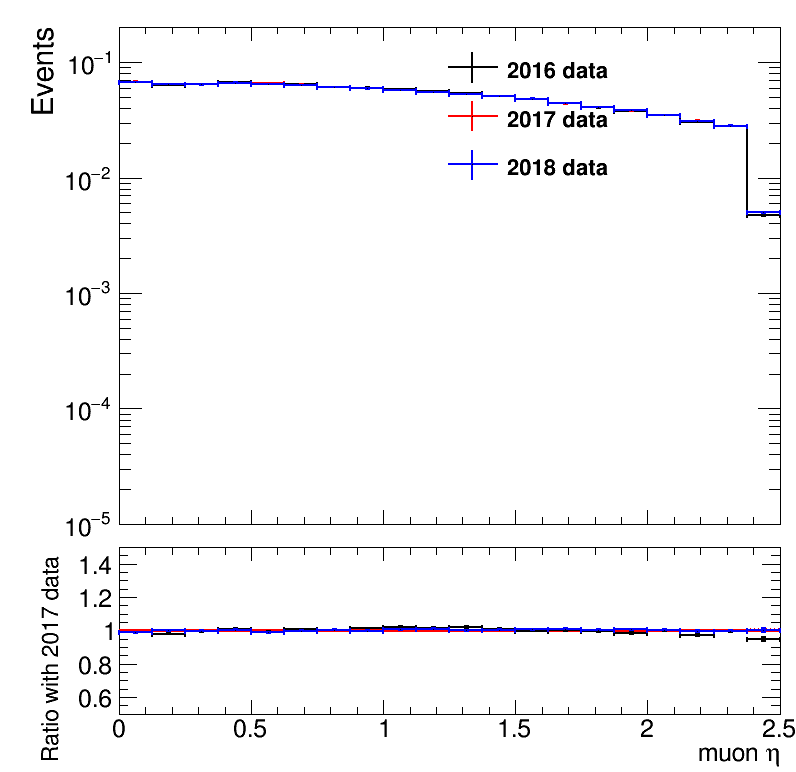

In [45]:
############ PLOTTING #########
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot, make_ratio_pEff
import os
h = {}

var = [ ZMass, ZPt, lepPt, lepE, lepEta]
title = ['Dimuon mass [GeV]', 'Z p_{T} [GeV]', 'muon pT [GeV]', 'muon E [GeV]', 'muon #eta']

bins = [ [25,120,800],  list(np.arange(0,300,25))+[300, 350, 400,500,800], list(np.arange(0,300,25))+[300, 350, 400,500,800], list(np.arange(0,500,50))+[500,575, 650, 725,800,900,1000]+[1200, 1600, 2000], [20,0.0,2.5],]
# bins = [ [40,int(m1),int(m2)],[25,50,120], list(np.arange(0,300,25))+[300, 350, 400,500,800], [50,0,2000], [20,0.0,2.5],]


reweight = False

names = ['ZMass','ZPt', 'cscRechitCluster2IsoMuonVetoPt', 'cscRechitCluster2IsoMuonVetoE', 'cscRechitCluster2IsoMuonVetoEta']
assert(len(var) == len(title) == len(names) == len(bins) )
dir_name = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_yearCompare_norm'+str(norm)+'_'+ver+sig_ver
print(dir_name)
if tag_probe: dir_name+="_tag_probe"
dir_name += '/'
if not os.path.isdir(dir_name):os.makedirs(dir_name)
keys = ['data16','data17','data18']
for j, v in enumerate(var):
#     if not j == 0:continue
    for i,k in enumerate(keys):
        
        h[k] = create_TH1D( np.abs(var[j][k].flatten()), axis_title=[title[j], 'Events'], name=k, binning=bins[j])

        print(k, h[k].Integral())
        h[k].Scale(1./h[k].Integral())

        h[k].SetLineColor(std_color_list[i])
    print(names[j], h[keys[0]].Integral()*1.0/h[keys[1]].Integral())


    c = make_ratio_plot([h[keys[0]],h[keys[1]],h[keys[2]]], fit = False, logy=False, in_tags = ['2016 data', '2017 data', '2018 data'], \
                        ratio_bounds = [0.5,1.5], ratio_index = 1, draw_opt = ['E1','E2','E1']) 
    c.Draw()
    m1 = '120'
    m2 = '800'
    c.SaveAs(dir_name+names[j]+'_Zmass'+m1+'_'+m2+'_muon'+str(muonPt)+'_norm'+str(norm)+'.png')
    c.SaveAs(dir_name+names[j]+'_Zmass'+m1+'_'+m2+'_muon'+str(muonPt)+'_norm'+str(norm)+'.C')
    c_log = make_ratio_plot([h[keys[0]],h[keys[1]],h[keys[2]]], fit = False, logy=True, in_tags = ['2016 data', '2017 data', '2018 data'], \
                        ratio_bounds = [0.5,1.5], ratio_index = 1, draw_opt = ['E1','E2','E1']) 
    c_log.Draw()

    c_log.SaveAs(dir_name+names[j]+'_Zmass'+m1+'_'+m2+'_muon'+str(muonPt)+'_norm'+str(norm)+'_log.png')
    c_log.SaveAs(dir_name+names[j]+'_Zmass'+m1+'_'+m2+'_muon'+str(muonPt)+'_norm'+str(norm)+'_log.C')
# for i in range(74):
#     print(i+1, h[keys[0]].GetBinCenter(i+1), h[keys[0]].GetBinContent(i+1)/h[keys[1]].GetBinContent(i+1))


### Cluster efficiency

In [48]:
%%time

jetPt_cut = 50
tightid = False
pileupWeight = {}
weight = {}
ZPt = {}
ZMass = {}
lepPt = {}
lepEta = {}
lepE = {}
lepE_tag = {}
lepEta_tag = {}
lepPt_tag = {}
mc_corr_weight = {}
rho = {}
npu = {}
npv = {}
tag_index = {}
probe_index = {}
lepOverallSF = {}
sel_lep = {}
sel_ev = {}
lepSF = {}
cond = {}
cscRechitClusterEta = {}
sel_tp = {}
muonPt = 50
norm = 50
tag_probe = True
m1 = '120'
m2 = '200'
for k , T in tree_bkg.items():
    if not 'data' in k:continue
    ########## select cluster ########
    sel_cluster = np.abs(T.array('cscRechitCluster3Time')) < 12.5
    if sig_ver == 'v15':
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3Size'))>=40)
    else:
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3Size'))>=50)
    sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3TimeSpread'))<20)
    sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3MaxChamber')) > 12)
    sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3Eta')) < 2.0)    
    sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3MuonVetoPt')) > muonPt)
    sel_cluster = np.logical_and(sel_cluster, np.logical_or(T.array('cscRechitCluster3ZLep1') == 1, T.array('cscRechitCluster3ZLep2') == 1))
    if tag_probe: 
        sel_cluster1 =np.logical_and(sel_cluster,  T.array('cscRechitCluster3ZLep1') == 1)   #loose lepton
        sel_cluster2 = np.logical_and(sel_cluster,  T.array('cscRechitCluster3ZLep2') == 1)  

# ########### BRANCHES ############
    sel_lep[k] = np.logical_and(T.array('lepPassId')==1, T.array("lepPassTightIso")==1) #tight iso+id lepton
    sel_lep[k] = np.logical_and(sel_lep[k], np.abs(T.array("lepPdgId"))==13) #tight iso+id lepton
    sel_ev[k] = sel_lep[k].sum()>=1
    sel_ev[k] = np.logical_and(sel_ev[k], (T.array('lepPt')>= muonPt).sum()==2)
    sel_ev[k] = np.logical_and(sel_ev[k], T.array("Flag2_all"))
    sel_ev[k] = np.logical_and(sel_ev[k], T.array('category')==2)
    sel_ev[k] = np.logical_and(sel_ev[k], T['HLTDecision'].array()[:,136])
    
    sel_ev[k] = np.logical_and(sel_ev[k], T.array('ZMass')>=int(m1))
    sel_ev[k] = np.logical_and(sel_ev[k], T.array('ZMass')<int(m2))

    probe_index[k] = []
    sel_tp[k] = []
    cond[k] = []
    sel_probecluster = []
    pdgid = T.array("lepPdgId")

    index = 0
    for i, ev in enumerate(sel_ev[k]):
        if ev:
            if sel_lep[k][i][0]:
                probe_index[k].append([False,True])
                sel_tp[k].append(index)
                if pdgid[i][0] == 13:
                    cond[k].append(np.logical_and(sel_cluster2[i].sum()==1, sel_cluster1[i].sum()==0))
                    if cond[k][-1]: sel_probecluster.append(list(sel_cluster2[i]))
                else:
                    cond[k].append(np.logical_and(sel_cluster1[i].sum()==1, sel_cluster2[i].sum()==0)) 
                    if cond[k][-1]:sel_probecluster.append(list(sel_cluster1[i]))
            if sel_lep[k][i][1]:
                probe_index[k].append([True, False])
                sel_tp[k].append(index)
                if pdgid[i][0] == -13:
                    cond[k].append(np.logical_and(sel_cluster2[i].sum()==1, sel_cluster1[i].sum()==0))
                    if cond[k][-1]:sel_probecluster.append(list(sel_cluster2[i]))
                else:
                    cond[k].append(np.logical_and(sel_cluster1[i].sum()==1, sel_cluster2[i].sum()==0)) 
                    if cond[k][-1]:sel_probecluster.append(list(sel_cluster1[i]))
            index+=1
    sel_tp[k] = np.array(sel_tp[k])
    probe_index[k] = np.array(probe_index[k])
    cond[k] = np.array(cond[k])
    sel_probecluster = awkward.fromiter(sel_probecluster)


    print("before sel")
    print(sel_probecluster[:10], len(sel_probecluster), np.count_nonzero(cond[k]))



 
    ZMass[k]= T.array('ZMass')[sel_ev[k]][sel_tp[k]]
    ZPt[k] = T.array('ZPt')[sel_ev[k]][sel_tp[k]]

   
    lepE[k] = np.array(T.array('lepE')[sel_ev[k]][sel_tp[k]])[probe_index[k]]
    lepEta[k] = np.array(T.array('lepEta')[sel_ev[k]][sel_tp[k]])[probe_index[k]]
    lepPt[k] = np.array(T.array('lepPt')[sel_ev[k]][sel_tp[k]])[probe_index[k]]
    print("here")
#         cscRechitClusterEta[k] = np.array(T.array('cscRechitCluster3Eta')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster]
    cscRechitClusterEta[k] = T.array('cscRechitCluster3Eta')[sel_ev[k]][sel_tp[k]][cond[k]]
    cscRechitClusterEta[k] = awkward.fromiter(cscRechitClusterEta[k])[sel_probecluster]



before sel
[[True] [True] [True] ... [True] [True] [True]] 757 757
here
before sel
[[True] [True] [True] ... [True] [True] [True]] 1070 1070
here
before sel
[[True] [True] [True] ... [True] [True] [True]] 1551 1551
here
CPU times: user 1min 44s, sys: 1.94 s, total: 1min 46s
Wall time: 1min 46s


/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_yearCompare_norm50_V1p17v24_tag_probe/efficiency_Zmass120_200_muon50_norm50.root
0 757
data16 0.003780584216821066
0 1070
data17 0.0043629981331004195
0 1551
data18 0.004427704613842985


Warning in <TFile::Append>: Replacing existing TH1: hm1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hb1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hm1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hb1 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_out_ratio
Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_yearCompare_norm50_V1p17v24_tag_probe/efficiency_muonEta_Zmass120_200_muon50_norm50.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_yearCompare_norm50_V1p17v24_tag_probe/efficiency_muonEta_Zmass120_200_muon50_norm50.C has been generated


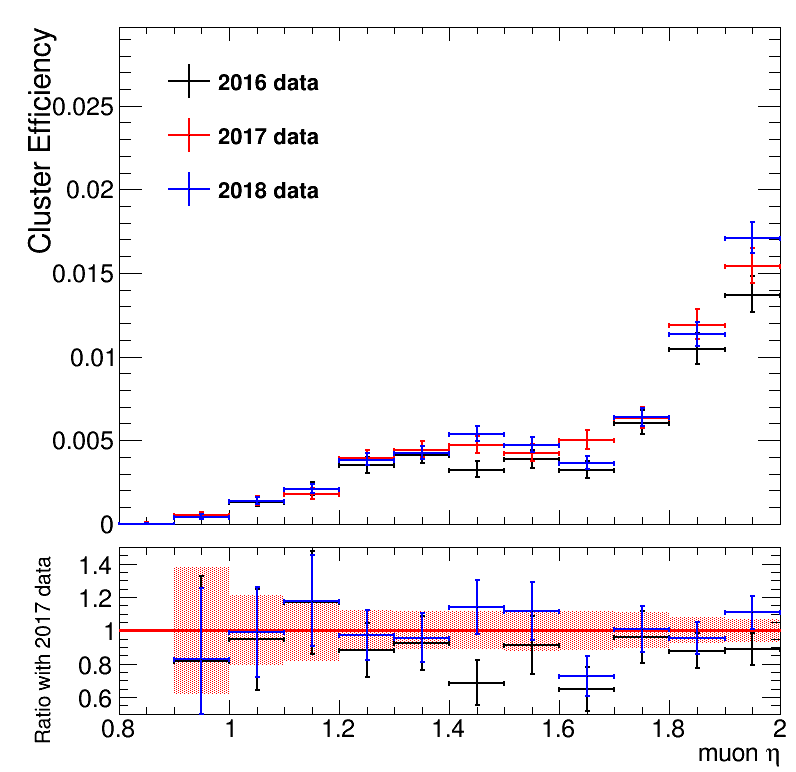

In [63]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot, make_ratio_pEff


c = rt.TCanvas('c','c', 800, 600)
leg = rt.TLegend(0.2,0.80,0.4,0.90)
leg.SetTextSize(0.03)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)






hm = {}
hb = {}
pEff = {}

var = [ZMass, lepPt, lepE, lepEta]
title = ['Dimuon mass [GeV]', 'muon pT [GeV]', 'muon E [GeV]', 'muon #eta']

bins = [ [20,int(m1),int(m2)],list(np.arange(0,300,25))+[300, 350, 400,500,800], list(np.arange(0,500,50))+[500,575, 650, 725,800,900,1000]+[1200, 2000], [12,0.8,2.0],]



names = ['ZMass','muonPt', 'muonE', 'muonEta']
assert(len(var) == len(title) == len(names) == len(bins) )
dir_name = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_yearCompare_norm'+str(norm)+'_'+ver+sig_ver


if tag_probe: dir_name+="_tag_probe"
dir_name += '/'
if not os.path.isdir(dir_name):os.makedirs(dir_name)
outputFileName = dir_name +"efficiency_"+'Zmass'+m1+'_'+m2+'_muon'+str(muonPt)+'_norm'+str(norm)+'.root'
print(outputFileName)
outFile = rt.TFile(outputFileName, 'RECREATE')


for j in range(len(bins)):
    if not j == 3:continue
    for i, k in enumerate(cond.keys()):
        hm[k] = create_TH1D(np.abs(var[j][k][cond[k]]), 'hm1', axis_title = [title[j],'Cluster Efficiency'], binning=bins[j])
        hb[k] = create_TH1D(np.abs(var[j][k]), 'hb1', axis_title = [title[j],'Cluster Efficiency'], binning=bins[j])
        print(np.count_nonzero(np.abs(var[j][k][cond[k]])<0.8), len(np.abs(var[j][k][cond[k]])))
        # print(hm.Integral()/hb.Integral(), len(z_denom)/len(llp_z), len(r_denom)/len(llp_r))
        print(k, hm[k].Integral()/hb[k].Integral())
        pEff[k] = rt.TEfficiency(hm[k],hb[k])
        pEff[k].SetLineColor(std_color_list[i])
        pEff[k].SetLineWidth(2)
        if k == 'data': leg.AddEntry(pEff[k], 'Data')
        else: leg.AddEntry(pEff[k], 'MC')
        outFile.WriteTObject(pEff[k], k+'_'+names[j], "WriteDelete");
#         pEff[k].Draw('AP' if i == 0 else 'P same')
    c = make_ratio_pEff([pEff[keys[0]],pEff[keys[1]],pEff[keys[2]]], fit = False, logy=False, in_tags = ['2016 data', '2017 data', '2018 data'], \
                        ratio_bounds = [0.5,1.5], ratio_index = 1, draw_opt = ['E1','E2','E1']) 
    rt.gPad.Update()
    c.Draw()
    c.SaveAs(dir_name+"efficiency_"+names[j]+'_Zmass'+m1+'_'+m2+'_muon'+str(muonPt)+'_norm'+str(norm)+'.png')
    c.SaveAs(dir_name+"efficiency_"+names[j]+'_Zmass'+m1+'_'+m2+'_muon'+str(muonPt)+'_norm'+str(norm)+'.C')

outFile.Close()




# length data 350271 8848

# Cluster-level variables with cluster requirement

In [7]:
jetPt_cut = 50
tightid = False
evtNum  = {}
lumiSec = {}
runNum = {}
sel_tp = {}
npv = {}
npu = {}
nJets = {}
nJets_50gev = {}
cscRechitClusterEta = {}
cscRechitClusterNStation10 = {}
cscRechitClusterAvgStation10 = {}
cscRechitClusterSize = {}
cscRechitClusterTimeSpread = {}
cscRechitClusterTimeWireSpread = {}
cscRechitClusterTimeTotalSpread = {}
cscRechitClusterTimeTotalSpreadPruned = {}
cscRechitClusterTimeTotal = {}
cscRechitClusterTimeWire = {}
cscRechitClusterTimeWirePruned = {}
cscRechitClusterTime = {}
ZMass = {}
npv = {}
datasets = {}
sel_lep = {}
sel_ev = {}
cut_based = {}
probe_index = {}
sel_tp = {}
cond = {}
mc_corr_weight = {}
mass_reweight = {}
muonPt = 50
tag_probe = True
norm = False
text = False
scaling = 'norm'
m1, m2 = '120', '800' 
for k, T in tree_bkg.items():
    if not k[:4] == 'data': continue

    sel_cluster = np.abs(T.array('cscRechitCluster3TimeTotal')) < 125
    if sig_ver == 'v15':
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3Size'))>=40)
    else:
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3Size'))>=50)
#     sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3TimeSpread'))<20)
    sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3MaxChamber')) > 12)
    sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3Eta')) < 2.0)    
    sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster3MuonVetoPt')) > muonPt)
    sel_cluster = np.logical_and(sel_cluster, np.logical_or(T.array('cscRechitCluster3ZLep1') == 1, T.array('cscRechitCluster3ZLep2') == 1))
    if tag_probe: 
        sel_cluster1 =np.logical_and(sel_cluster,  T.array('cscRechitCluster3ZLep1') == 1)   #loose lepton
        sel_cluster2 = np.logical_and(sel_cluster,  T.array('cscRechitCluster3ZLep2') == 1)  

# ########### BRANCHES ############
    sel_lep[k] = np.logical_and(T.array('lepPassId')==1, T.array("lepPassTightIso")==1) #tight iso+id lepton
    sel_lep[k] = np.logical_and(sel_lep[k], np.abs(T.array("lepPdgId"))==13) #tight iso+id lepton
    sel_ev[k] = sel_lep[k].sum()>=1
    sel_ev[k] = np.logical_and(sel_ev[k], (T.array('lepPt')>= muonPt).sum()==2)
    sel_ev[k] = np.logical_and(sel_ev[k], T.array("Flag2_all"))
    sel_ev[k] = np.logical_and(sel_ev[k], T.array('category')==2)
    sel_ev[k] = np.logical_and(sel_ev[k], T['HLTDecision'].array()[:,136])
    sel_ev[k] = np.logical_and(sel_ev[k], T.array('ZMass')>=int(m1))
    sel_ev[k] = np.logical_and(sel_ev[k], T.array('ZMass')<int(m2))

    probe_index[k] = []
    sel_tp[k] = []
    cond[k] = []
    sel_probecluster = []
    pdgid = T.array("lepPdgId")

    index = 0
    for i, ev in enumerate(sel_ev[k]):
        if ev:
            if sel_lep[k][i][0]:
                probe_index[k].append([False,True])
                sel_tp[k].append(index)
                if pdgid[i][0] == 13:
                    cond[k].append(np.logical_and(sel_cluster2[i].sum()==1, sel_cluster1[i].sum()==0))
                    if cond[k][-1]: sel_probecluster.append(sel_cluster2[i])
                else:
                    cond[k].append(np.logical_and(sel_cluster1[i].sum()==1, sel_cluster2[i].sum()==0)) 
                    if cond[k][-1]:sel_probecluster.append(sel_cluster1[i])
            if sel_lep[k][i][1]:
                probe_index[k].append([True, False])
                sel_tp[k].append(index)
                if pdgid[i][0] == -13:
                    cond[k].append(np.logical_and(sel_cluster2[i].sum()==1, sel_cluster1[i].sum()==0))
                    if cond[k][-1]:sel_probecluster.append(sel_cluster2[i])
                else:
                    cond[k].append(np.logical_and(sel_cluster1[i].sum()==1, sel_cluster2[i].sum()==0)) 
                    if cond[k][-1]:sel_probecluster.append(sel_cluster1[i])
            index+=1
    sel_tp[k] = np.array(sel_tp[k])
    probe_index[k] = np.array(probe_index[k])

    cond[k] = np.array(cond[k])
    sel_probecluster = awkward.fromiter(sel_probecluster)

    cscRechitClusterTimeSpread[k] = awkward.fromiter(T.array('cscRechitCluster3TimeSpread')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterTimeWireSpread[k] = awkward.fromiter(T.array('cscRechitCluster3TimeWireSpread')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterTimeTotalSpread[k] = awkward.fromiter(T.array('cscRechitCluster3TimeTotalSpread')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]

    cscRechitClusterTimeTotalSpreadPruned[k] = awkward.fromiter(T.array('cscRechitCluster3TimeTotalSpreadPruned')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterTimeWire[k] = awkward.fromiter(T.array('cscRechitCluster3TimeWire')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterTimeWirePruned[k] = awkward.fromiter(T.array('cscRechitCluster3TimeWirePruned')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterTime[k] = awkward.fromiter(T.array('cscRechitCluster3Time')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterTimeTotal[k] = awkward.fromiter(T.array('cscRechitCluster3TimeTotal')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]


    
    time_cond = np.logical_and(cscRechitClusterTime[k]>-5, cscRechitClusterTime[k]<12.5)
    denom = cscRechitClusterTimeSpread[k]<20
    hm = create_TH1D( np.ones(cscRechitClusterTime[k].shape)[time_cond&denom], name=k, binning=[1,0,2])
    hb = create_TH1D( np.ones(cscRechitClusterTime[k].shape)[denom], name=k, binning=[1,0,2])
    eff = rt.TEfficiency(hm,hb)
    print(k,'time cut efficiency', eff.GetEfficiency(1),eff.GetEfficiencyErrorUp(1),eff.GetEfficiencyErrorLow(1))


    hm = create_TH1D( np.ones(cscRechitClusterTimeSpread[k].shape)[time_cond&denom], name=k, binning=[1,0,2])
    hb = create_TH1D( np.ones(cscRechitClusterTimeSpread[k].shape)[time_cond], name=k, binning=[1,0,2])
    eff = rt.TEfficiency(hm,hb)
    print(k,'time spread efficiency', eff.GetEfficiency(1),eff.GetEfficiencyErrorUp(1),eff.GetEfficiencyErrorLow(1))


    cscRechitClusterEta[k] = awkward.fromiter(T.array('cscRechitCluster3Eta')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterSize[k] = awkward.fromiter(T.array('cscRechitCluster3Size')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterNStation10[k] = awkward.fromiter(T.array('cscRechitCluster3NStation10')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    cscRechitClusterAvgStation10[k] = awkward.fromiter(T.array('cscRechitCluster3AvgStation10')[sel_ev[k]][sel_tp[k]][cond[k]])[sel_probecluster][:,0]
    npv[k] = awkward.fromiter(T.array('npv')[sel_ev[k]][sel_tp[k]][cond[k]])

    ZMass[k]= T.array('ZMass')[sel_ev[k]][sel_tp[k]][cond[k]]
    ########### CUT-BASED ID ###########
    cond2 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==2, np.abs(cscRechitClusterEta[k]) < 1.6)
    cond3 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==3, np.abs(cscRechitClusterEta[k]) < 1.6)
    cond4 = np.logical_and(np.abs(cscRechitClusterAvgStation10[k])==4, np.abs(cscRechitClusterEta[k]) < 1.8)
    cond1 = np.logical_and(cscRechitClusterNStation10[k]==1, np.logical_or(np.logical_or(np.abs(cscRechitClusterAvgStation10[k])==1, cond2), np.logical_or(cond3, cond4)))
    cond2 = np.logical_and(cscRechitClusterNStation10[k] > 1, np.abs(cscRechitClusterEta[k]) < 1.9)
    cut_based[k] = np.logical_or(np.logical_or(cond1, cond2), np.logical_or(cond3, cond4))
    print("cut_based efficiency 10", k, 1.0* np.count_nonzero([cut_based[k]])/len(cut_based[k]))
    hm = create_TH1D( np.ones(cut_based[k].shape)[cut_based[k]], name=k, binning=[1,0,2])
    hb = create_TH1D( np.ones(cut_based[k].shape), name=k, binning=[1,0,2])
    eff = rt.TEfficiency(hm,hb)
    print(eff.GetEfficiency(1),eff.GetEfficiencyErrorUp(1),eff.GetEfficiencyErrorLow(1))

data16 time cut efficiency 0.9811643835616438 0.003961637361765136 0.0048739066627627725
data16 time spread efficiency 0.9581939799331104 0.005800415922322832 0.006621653698127394
cut_based efficiency 10 data16 0.6555915721231766
0.6555915721231766 0.013796794605836604 0.01405639400371772
data17 time cut efficiency 0.9717978848413631 0.004014137561759723 0.0046089967611513405
data17 time spread efficiency 0.9403069926094372 0.005672223234372664 0.006197902493008889
cut_based efficiency 10 data17 0.6497545008183306
0.6497545008183306 0.01132854019475571 0.011495883015115282
data18 time cut efficiency 0.9476461038961039 0.0045017360143942975 0.004881446545601076
data18 time spread efficiency 0.92402057776019 0.005295374773239381 0.005643494871601318
cut_based efficiency 10 data18 0.6563763322307975
0.6563763322307975 0.009227968970773825 0.009345203065155294


Warning in <TROOT::Append>: Replacing existing TH1: data16 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: data16 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: data16 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: data16 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: data16 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: data17 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: data17 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: data17 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: data17 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: data17 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: data18 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: data18 (Potential memory

/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_yearCompare_norm50_V1p17v83_tag_probe/
0.0 0.0014908014626439615 0.0
data16 0.0
0.0 0.0010038720214187815 0.0
data17 0.0
0.0 0.000676368603522197 0.0
data18 0.0
1.0 0.0 0.0014908014626439092
data16 1.0
1.0 0.0 0.001003872021418717
data17 1.0
1.0 0.0 0.0006763686035221594
data18 1.0
1.0 0.0 0.0014908014626439092
data16 1.0
1.0 0.0 0.001003872021418717
data17 1.0
1.0 0.0 0.0006763686035221594
data18 1.0
0.0 0.0014908014626439615 0.0
data16 0.0
0.0 0.0010038720214187815 0.0
data17 0.0
0.0 0.000676368603522197 0.0
data18 0.0
1.0 0.0 0.0014908014626439092
data16 1.0
1.0 0.0 0.001003872021418717
data17 1.0
1.0 0.0 0.0006763686035221594
data18 1.0
0.9692058346839546 0.004919105572519178 0.005741936365144307
data16 0.9692058346839546
0.9596290234588107 0.00460766309773164 0.005138799379527437
data17 0.9596290234588107
0.9287026828371923 0.004954057425165859 0.00528084248749

Warning in <TROOT::Append>: Replacing existing TH1: data16 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: data16 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: data17 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: data17 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: data18 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: data18 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_out_ratio
Info in <TCanvas::Print>: png file /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_yearCompare_norm50_V1p17v83_tag_probe/ZMass_requireCluster_muonPt50_120_800.png has been created
Info in <TCanvas::SaveSource>: C++ Macro file: /storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_Singl

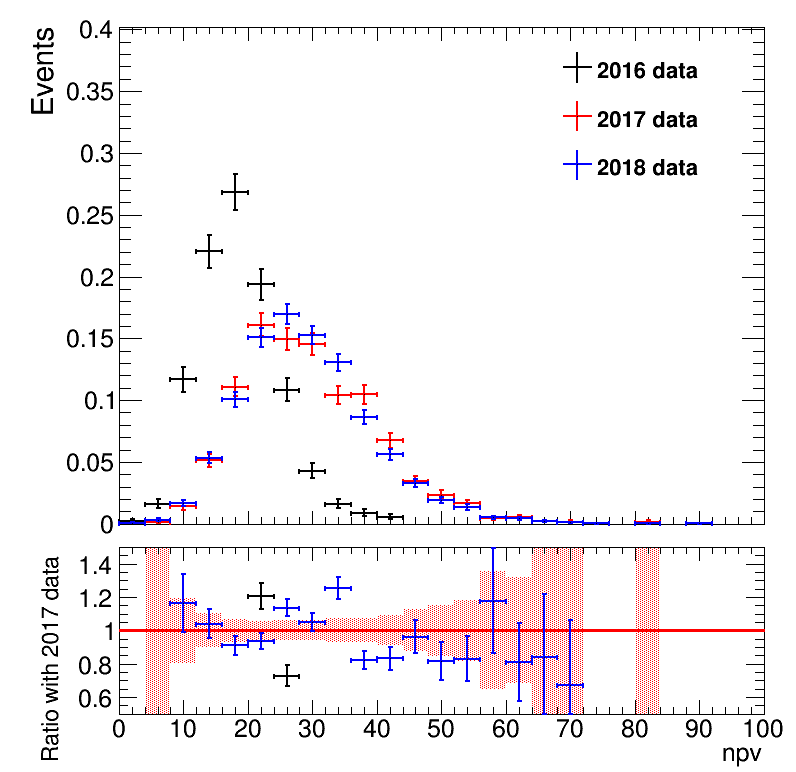

In [18]:
# Plotting ncsc
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot, make_ratio_pEff

keys = ['data16','data17','data18']


rt.gStyle.SetOptFit(1011)
dir_name = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_yearCompare_norm50_'+ver+sig_ver
if tag_probe: dir_name+="_tag_probe"
dir_name += '/'
if not os.path.isdir(dir_name):os.makedirs(dir_name)

var = [ZMass, cscRechitClusterNStation10, cscRechitClusterAvgStation10,cscRechitClusterSize, cscRechitClusterEta,\
       cscRechitClusterTime, cscRechitClusterTimeTotal,cscRechitClusterTimeWire,cscRechitClusterTimeWirePruned,\
       cscRechitClusterTimeSpread, cscRechitClusterTimeWireSpread, cscRechitClusterTimeTotalSpread, cscRechitClusterTimeTotalSpreadPruned,npv]
title = ['Dimuon mass [GeV]', 'N_{station}', 'Avg Station','N_{rechits}', 'cluster #eta',\
         'cluster strip time [ns]', 'cluster time [ns]','cluster wire time [ns]','cluster wire time(Pruned) [ns]', \
          'cluster strip time spread [ns]', 'cluster wire time spread [ns]', 'cluster total time spread [ns]', 'cluster total time spread(pruned) [ns]','npv']
bins = [ [25,int(m1),int(m2)],[5,0,5],[20,1,4], [0, 50, 70, 100, 150, 250, 500],[12,0.8,2.0],[30,-15,15],[25,0,50],[25,0,100]]
bins = [ [25,int(m1),int(m2)],[5,0,5],[20,1,4], [0, 50, 70, 100, 150, 250, 500],[12,0.8,2.0],\
        [30,-15,15],[30,-15,15],[30,-15,20],[30,-15,20],\
      list(np.arange(0,20,2))+list(np.arange(20,35,5))+[50],list(np.arange(0,20,2))+list(np.arange(20,35,5))+[50],list(np.arange(0,20,2))+list(np.arange(20,35,5))+[50],list(np.arange(0,20,2))+list(np.arange(20,35,5))+[50],[25,0,100]]
        
names = ['ZMass','cscRechitClusterNStation10',  'cscRechitClusterAvgStation10', 'cscRechitClusterSize','cscRechitClusterEta',\
         'cscRechitClusterTime', 'cscRechitClusterTimeTotal','cscRechitClusterTimeWire','cscRechitClusterTimeWirePruned',\
       'cscRechitClusterTimeSpread', 'cscRechitClusterTimeWireSpread', 'cscRechitClusterTimeTotalSpread', 'cscRechitClusterTimeTotalSpreadPruned','npv']

assert(len(var) == len(title) == len(names) == len(bins))
reweight_index = 13
reweight= 0
print(dir_name)
for j,v in enumerate(var):

    h = {}
    maximum = 0
#     if not j == 11:continue
    for i,k in enumerate(cut_based.keys()):
        cond = npv[k]>=0
        if j >=9 and j <=12: cond = np.abs(cscRechitClusterTime[k])<12.5
        elif j >=5 and j <=8:cond = cscRechitClusterTimeSpread[k]<20
        else:cond = np.logical_and(np.abs(cscRechitClusterTimeTotal[k])<12.5,cscRechitClusterTimeSpread[k]<20)
        cond = cscRechitClusterTimeSpread[k]>=0
#         cond = np.logical_and(npv[k]<60, npv[k]>=0)
#         var =npv
#         print(k, np.mean(np.abs(var[k][cscRechitClusterNStation10[k]==1])), np.mean(np.abs(var[k][cscRechitClusterNStation10[k]==2])), np.mean(np.abs(var[k][cscRechitClusterNStation10[k]==3])), np.mean(np.abs(var[k][cscRechitClusterNStation10[k]==4])))
        if reweight and not '17' in k:
            h_reweight = {}
            h_reweight['reweight'] = create_TH1D( np.abs(v[k]), axis_title=['', ''], name=k, binning=bins[reweight_index])
            h_reweight['17'] = create_TH1D( np.abs(v['data17']), axis_title=['', ''], name='17', binning=bins[reweight_index])
            h_reweight['17'].Divide(h_reweight['reweight'])
            weight = []
            for m in range(len(v[k])):
                weight.append(h_reweight['17'].GetBinContent(h_reweight['17'].GetXaxis().FindFixBin(np.abs(v[k])[m])))
            weight = np.array(weight)
        else:weight = np.ones((len(v[k]),))
        if j == 5 or j == 6 or j == 7: h[k] = create_TH1D( v[k][cond], axis_title=[title[j], 'Events'], name=k, binning=bins[j],weights = weight[cond])
        else: h[k] = create_TH1D( np.abs(v[k][cond]), axis_title=[title[j], 'Events'], name=k, binning=bins[j],weights = weight[cond])
        h[k].Scale(1./h[k].Integral())
        h[k].SetLineColor(std_color_list[i])
        
        new_cond = np.logical_and(v[k][cond]<12.5, v[k][cond]>-5)
        hm = create_TH1D( np.ones((np.count_nonzero(new_cond),)), name=k, binning=[1,0,2], weights = weight[cond][new_cond])
        hb = create_TH1D( np.ones((len(v[k][cond]),)), name=k, binning=[1,0,2],weights = weight[cond])
        eff = rt.TEfficiency(hm,hb)
        print(eff.GetEfficiency(1),eff.GetEfficiencyErrorUp(1),eff.GetEfficiencyErrorLow(1))
        print(k, np.sum(weight[cond][new_cond])/np.sum(weight[cond]))


    
    if j >=9 and j <=12: c = make_ratio_plot([h[keys[0]],h[keys[1]],h[keys[2]]], fit = False, logy=0, in_tags = ['2016 data', '2017 data', '2018 data'], \
                        ratio_bounds = [0.5,2], ratio_index = 1, draw_opt = ['E1','E1','E1']) 
    elif j >=5 and j <=8: c = make_ratio_plot([h[keys[0]],h[keys[1]],h[keys[2]]], fit = False, logy=0, in_tags = ['2016 data', '2017 data', '2018 data'], \
                        ratio_bounds = [0,3], ratio_index = 1, draw_opt = ['E1','E1','E1']) 
    else:c = make_ratio_plot([h[keys[0]],h[keys[1]],h[keys[2]]], fit = False, logy=0, in_tags = ['2016 data', '2017 data', '2018 data'], \
                        ratio_bounds = [0.5,1.5], ratio_index = 1, draw_opt = ['E1','E1','E1']) 
    c.Draw()
 

    
    file_name = dir_name+names[j]+"_requireCluster_muonPt"+str(muonPt)+"_"+m1+'_'+m2
    if reweight==1:file_name = file_name+"_reweight"+names[reweight_index]
    c.SaveAs(file_name+".png")
    c.SaveAs(file_name+".C")

#     if text: c_log = make_ratio_plot([h[key_plot[1]],h[key_plot[0]]], fit = False, logy=True, in_tags = ["MC brem","Data brem"], ratio_bounds = [0.5,1.5], \
#                 draw_opt = ['E2','E1'], text = texts) 
#     else:c_log = make_ratio_plot([h[key_plot[1]],h[key_plot[0]]], fit = False, logy=True, in_tags = ["MC brem","Data brem"], ratio_bounds = [0.5,1.5], \
#                 draw_opt = ['E2','E1']) 
#     c_log.Draw()
#     c_log.SaveAs(file_name+"_log.png")
#     c_log.SaveAs(file_name+"_log.C")
   

# Correlation

In [ ]:

k = 'data'
var = [cscRechitClusterNStation, cscRechitClusterNStation5, cscRechitClusterNStation10perc, cscRechitClusterAvgStation, cscRechitClusterAvgStation5, cscRechitClusterAvgStation10perc,\
cscRechitClusterMaxStation, dphiMet_cluster, jetMet_dPhiMin, cscRechitClusterSize, bdt_score, cscRechitClusterEta, cscRechitClusterPhi, \
cscRechitClusterX, cscRechitClusterY, cscRechitClusterZ, cscRechitClusterR, \
   cscRechitClusterEtaSpread, cscRechitClusterPhiSpread, cscRechitClusterEtaPhiSpread, cscRechitClusterRSpread, cscRechitClusterXSpread, cscRechitClusterYSpread, cscRechitClusterZSpread, \
       cscRechitClusterTimeSpread, cscRechitClusterXYSpread, cscRechitCluster2IsoMuonVetoPt, cscRechitCluster2IsoMuonVetoE, cscRechitCluster2IsoMuonVetoEta]
title = ['N_{station}', 'N_{station}', 'N_{station}', 'Avg Station', 'Avg Station', 'Avg Station',\
    'max station', 'dphiMet_cluster', 'jetMet_dPhiMin','N_{rechits}', 'BDT score', 'cluster #eta', 'cluster #phi', \
         'cluster X [cm]','cluster Y [cm]','cluster Z [cm]', 'cluster R [cm]',\
         'cluster #eta spread', 'cluster #phi spread', 'cluster #eta-#phi spread', 'cluster R-spread [cm]', 'cluster X-spread [cm]','cluster Y-spread [cm]','cluster Z-spread [cm]',\
          'cluster time spread [ns]', 'cluster XY-spread [cm]', 'matched muon pT [GeV]', 'matched muon E [GeV]', 'matched muon #eta']

bins = [ [5,0,5], [5,0,5],[5,0,5],[30,1,4], [30,1,4],[30,1,4], \
        [5,0,5], [10,0,3.2], [10,0,3.2], [0, 50, 70, 100, 150, 250, 500], [10,0,1], [30,eta0,eta1+0.05],[25,0,3.2],\
        [15,0,700],[15,0,700], [50,650,1100], [50,200,800],\
        [25,0,0.2], [25,0,0.1],[25,0,0.1], [10,0,100], [20,0,100], [20,0,100], [20,0,100],
       [25,0,50],[20,0,60], [25,0,500], [25,0,500], [10,eta0-0.2,eta1+0.2],]

bins_ks = [ [5,0,5], [5,0,5],[5,0,5],[300,1,4], [300,1,4],[300,1,4], \
           [5,0,5], [1000,0,3.2], [1000,0,3.2], [0, 50, 70, 100, 150, 250, 500], [1000,0,1], [1000,eta0-0.2,eta1+0.2],[1000,0,3.2],\
           [1000,0,700],[1000,0,700], [1000,600,1100], [500,200,800],\
        [1000,0,0.2], [1000,0,0.1],[1000,0,0.05], [1000,0,150], [1000,0,150], [1000,0,150], [1000,0,200],
       [1000,0,50],[1000,0,60], [1000,0,600], [1000,0,600], [1000,eta0-0.3,eta1+0.3],]


names = ['cscRechitClusterNStation', 'cscRechitClusterNStation5', 'cscRechitClusterNStation10perc', 'cscRechitClusterAvgStation', 'cscRechitClusterAvgStation5', 'cscRechitClusterAvgStation10perc',\
         'cscRechitClusterMaxStation', 'dphiMet_cluster', 'jetMet_dPhiMin', 'cscRechitClusterSize', 'bdt_score', 'cscRechitClusterEta', 'cscRechitClusterPhi', \
         'cscRechitClusterX', 'cscRechitClusterY', 'cscRechitClusterZ', 'cscRechitClusterR',\
   'cscRechitClusterEtaSpread', 'cscRechitClusterPhiSpread', 'cscRechitClusterEtaPhiSpread', 'cscRechitClusterRSpread', 'cscRechitClusterXSpread', 'cscRechitClusterYSpread', 'cscRechitClusterZSpread', \
               'cscRechitClusterTimeSpread', 'cscRechitClusterXYSpread', 'cscRechitCluster2IsoMuonVetoPt', 'cscRechitCluster2IsoMuonVetoE', 'cscRechitCluster2IsoMuonVetoEta']
assert(len(var) == len(title) == len(names) == len(bins) == len(bins_ks))

for i in range(len(names)):
    if not i == 20: continue
    cond  = bdt_score[k]<=0.2
    cond = cscRechitCluster2IsoMuonVetoPt[k]<200
    h = {}
    leg = rt.TLegend(0.2,0.73,0.85,0.85)
    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)

    c = rt.TCanvas('c','c', 800, 800)
    rt.gStyle.SetOptFit(1011)
    # h = create_TH2D(np.column_stack((bdt_score[k][cond], var[i][k][cond])),  axis_title=['bdt score', title[i], 'Events'], binning = [10,0,1]+bins[i])
#     h = create_TH2D(np.column_stack((np.abs(cscRechitClusterEta[k][cond]), np.abs(cscRechitClusterPhi[k][cond]))),  axis_title=['eta', 'phi', 'Events'], binning = [50,0.9,1.2,50,0,3.2])

#     h = create_TH2D(np.column_stack((np.abs(cscRechitClusterXSpread[k][cond]), np.abs(cscRechitClusterYSpread[k][cond]))), \
#                     axis_title=['x spread', 'y spread', 'Events'], binning = [50,0,50,50,0,60])
#     h = create_TH2D(np.column_stack((np.abs(cscRechitClusterRSpread[k][cond]), (cscRechitClusterX[k][cond]**2+cscRechitClusterY[k][cond]**2)**0.5)), \
#                     axis_title=['r spread', 'r', 'Events'], binning = [50,0,100,50,500,700])




    h['low_bdt'] = create_TH1D(var[i][k][cond],  axis_title=[ title[i], 'Events'], binning = bins[i])
    h['high_bdt'] = create_TH1D(var[i][k][np.logical_not(cond)],  axis_title=[ title[i], 'Events'], binning = bins[i])

    h['low_bdt'].SetLineColor(1)
    h['high_bdt'].SetLineColor(2)
    leg.AddEntry(h['low_bdt'],'cscRechitCluster2IsoMuonVetoPt =< 200')
    leg.AddEntry(h['high_bdt'],'cscRechitCluster2IsoMuonVetoPt > 200')

    h['high_bdt'].SetMaximum(h['high_bdt'].Integral())


    h['high_bdt'].DrawNormalized()
    h['low_bdt'].DrawNormalized('same')
#     h.Draw('colz')
    c.SetRightMargin(0.1)
    c.SetLogy()
    leg.Draw()
    c.Draw()
#     c.SaveAs(dir_name+names[i]+"_withRatio_splitBDT_phi"+str(phi_corr).replace(".", "p")+"_r"+str(r_corr).replace(".", "p")+".png")






# uncertainty calculation

In [ ]:
%%time

import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
import os


pileupWeight = {}
weight = {}
cscRechitClusterXSpread = {}
cscRechitClusterYSpread = {}
cscRechitClusterEta = {}
cscRechitClusterPhi = {}
cscRechitClusterNStation5 = {}
cscRechitClusterAvgStation5 = {}
cscRechitClusterXYSpread = {}
cscRechitCluster2IsoMuonVetoE = {}
bdt_score = {}
datasets = {}
jetMet_dPhiMin = {}
dphiMet_cluster = {}
keys = ['mc_bkg', 'data', 'mc_bkg_corr']
keys = ['mc_bkg', 'mc_signal', 'data']


unc = [] #data/mc_corr
unc2 = [] #mc/mc_corr
muonPt = 50
for eta0 in list(np.arange(0.8, 2.0, 0.2)):
    eta0 = round(eta0,2)
    eta1 = round(eta0+1.2, 2)
#     if not eta0 == 1.6: continue
    print("eta0", eta0)
#     if eta0 == 0.8:
#         phi_corr=0.75
#         r_corr=1.2
#     elif eta0 == 1.0:
#         phi_corr=0.7
#         r_corr=1.15
#     elif eta0 == 1.2:
#         phi_corr=0.6
#         r_corr=1.1
#     elif eta0 == 1.4:
#         phi_corr=0.55
#         r_corr=1.1
#     elif eta0 == 1.6:
#         phi_corr=0.75
#         r_corr=1.1
#     elif eta0 == 1.8:
#         phi_corr=0.75
#         r_corr=1.05
#     else:
#         print("ETA0 ERROR")
    if not eta0==0.8:continue
        
#     if eta0 == 0.8:
#         phi_corr=0.65
#         r_corr=1.2
#     elif eta0 == 1.0:
#         phi_corr=0.6
#         r_corr=1.15
#     elif eta0 == 1.2:
#         phi_corr=0.6
#         r_corr=1.1
#     elif eta0 == 1.4:
#         phi_corr=0.55
#         r_corr=1.1
#     elif eta0 == 1.6:
#         phi_corr=0.7
#         r_corr=1.05
#     elif eta0 == 1.8:
#         phi_corr=0.75
#         r_corr=1.05
#     else:
#         print("ETA0 ERROR")
    if eta0 == 0.8:
        phi_corr=0.65
        r_corr=1.15
    elif eta0 == 1.0:
        phi_corr=0.65
        r_corr=1.1
    elif eta0 == 1.2:
        phi_corr=0.6
        r_corr=1.05
    elif eta0 == 1.4:
        phi_corr=0.55
        r_corr=1.1
    elif eta0 == 1.6:
        phi_corr=0.7
        r_corr=1.05
    elif eta0 == 1.8:
        phi_corr=0.75
        r_corr=1.1
    else:
        print("ETA0 ERROR")
#     if not eta0==0.8:continue


    for ind in range(len(phi_corr_lst)):
        if phi_corr_lst[ind] == phi_corr:phi_corr_i = ind
    for ind in range(len(r_corr_lst)):
        if r_corr_lst[ind] == r_corr:r_corr_i = ind
    
    for k in keys:
        if 'mc' in k: T = tree_bkg['mc']
        else: T = tree_bkg[k]
        sel_cluster = np.abs(T.array('cscRechitCluster2Time')) < 12.5
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2Size'))>=50)
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2TimeSpread'))<20)
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2MaxChamber')) > 12)            
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2Eta')) >= eta0)
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2Eta')) < eta1)    
        if k == 'mc_signal':
            sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster2_match_gLLP_csc') == 1)
        else:
            sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2MuonVetoPt')) > muonPt)
            sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2MuonVetoPt')) < 2000)
            sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2MuonVetoTightIso')) == 1)
            sel_cluster = np.logical_and(sel_cluster, np.logical_or(T.array('cscRechitCluster2ZLep1') == 1, T.array('cscRechitCluster2ZLep2') == 1))
            if 'mc_bkg' in k:
                sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster2_match_gLLP') == 0) 
                sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster2GenMuonVetoPt') > muonPt)
                sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster2GenMuonVetoPt') < 2000)
            elif k == 'data':
    #             sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2Met_dPhi')) < 1)
                if singleMuon: 
                    sel_cluster = np.logical_and(sel_cluster, np.logical_or(T.array('cscRechitCluster2ZLep1') == 1, T.array('cscRechitCluster2ZLep2') == 1))
                else: 
                    sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2Met_dPhi')) < 2.5)
        # ########### BRANCHES ############
        sel_ev = sel_cluster.sum() ==1 
        if k == 'data':
            sel_ev = np.logical_and(sel_ev, T.array("Flag2_all"))
            if singleMuon: 
                sel_ev = np.logical_and(sel_ev, T.array('category')==2)
                sel_ev = np.logical_and(sel_ev, np.abs(T.array('ZMass')-90)<=30)
                if eta0 == 1.0: sel_ev = np.logical_and(sel_ev, T.array('runNum')>284044) # only include 2017 and 2018


            else: sel_ev = np.logical_and(sel_ev, np.abs(T.array('jetMet_dPhiMin'))>2)
        if not k == 'mc_signal':
            sel_ev = np.logical_and(sel_ev, T.array('category')==2)
            sel_ev = np.logical_and(sel_ev, np.abs(T.array('ZMass')-90)<=30)



        cscRechitClusterXSpread[k] = T.array('cscRechitCluster2XSpread')[sel_cluster][sel_ev][:,0]
        cscRechitClusterYSpread[k] = T.array('cscRechitCluster2YSpread')[sel_cluster][sel_ev][:,0]
        cscRechitClusterXYSpread[k] = T.array('cscRechitCluster2XYSpread')[sel_cluster][sel_ev][:,0]
        cscRechitClusterEta[k] = T.array('cscRechitCluster2Eta')[sel_cluster][sel_ev][:,0]
        cscRechitClusterPhi[k] = T.array('cscRechitCluster2Phi')[sel_cluster][sel_ev][:,0]
        cscRechitClusterNStation5[k] = T.array('cscRechitCluster2NStation5')[sel_cluster][sel_ev][:,0]
        cscRechitClusterAvgStation5[k] = T.array('cscRechitCluster2AvgStation5')[sel_cluster][sel_ev][:,0]
        cscRechitCluster2IsoMuonVetoE[k] = T.array('cscRechitCluster2IsoMuonVetoE')[sel_cluster][sel_ev][:,0]
        dphiMet_cluster[k] = np.abs(T.array('cscRechitCluster2Met_dPhi'))[sel_cluster][sel_ev][:,0]
        if 'corr' in k:
            cscRechitClusterXSpread[k] = T.array('cscRechitCluster2XSpread_corr')[:,:,phi_corr_i,r_corr_i][sel_cluster][sel_ev][:,0]
            cscRechitClusterYSpread[k] = T.array('cscRechitCluster2YSpread_corr')[:,:,phi_corr_i,r_corr_i][sel_cluster][sel_ev][:,0]
            cscRechitClusterXYSpread[k] = T.array('cscRechitCluster2XYSpread_corr')[:,:,phi_corr_i,r_corr_i][sel_cluster][sel_ev][:,0]


        ##### bdt variables ####
        if bdt_name=='bdt_flatten_metfilter_me1112nohits_eta2p1_testsize0p2_abs_XYspread_v11':
            bdt_var = {'cscRechitClusterNStation': cscRechitClusterNStation5[k],
            'cscRechitClusterXSpread': cscRechitClusterXSpread[k],
            'cscRechitClusterYSpread':cscRechitClusterYSpread[k],
            'cscRechitClusterXYSpread':cscRechitClusterXYSpread[k],
            'cscRechitClusterPhi':np.abs(cscRechitClusterPhi[k]),
            'cscRechitClusterEta':np.abs(cscRechitClusterEta[k]),
            'cscRechitClusterZ':np.abs(cscRechitClusterZ[k]),
            }
        elif bdt_name=='bdt_flatten_metfilter_me1112nohits_eta2p1_testsize0p2_abs_XYspread_v12':
            bdt_var = {'cscRechitClusterNStation': cscRechitClusterNStation5[k],
            'cscRechitClusterXSpread': cscRechitClusterXSpread[k],
            'cscRechitClusterYSpread':cscRechitClusterYSpread[k],
            'cscRechitClusterXYSpread':cscRechitClusterXYSpread[k],
            'cscRechitClusterPhi':np.abs(cscRechitClusterPhi[k]),
            'cscRechitClusterEta':np.abs(cscRechitClusterEta[k]),
            'cscRechitClusterAvgStation5':np.abs(cscRechitClusterAvgStation5[k]),
            }
        elif bdt_name =='bdt_flatten_metfilter_me1112nohits_eta2p0_testsize0p2_noSpread_v1':
            bdt_var = {'cscRechitClusterNStation': cscRechitClusterNStation5[k],
            'cscRechitClusterPhi':np.abs(cscRechitClusterPhi[k]),
            'cscRechitClusterEta':np.abs(cscRechitClusterEta[k]),
            'cscRechitClusterAvgStation5':np.abs(cscRechitClusterAvgStation5[k]),
            }
        else:
            print('BDT NOT FOUND')


        dataset = pd.DataFrame(bdt_var)
        assert(dataset.isnull().values.any() == False)
        datasets[k] = dataset
        bdt_score[k] = model.predict_proba(dataset.values)[:, 1] 
        jetMet_dPhiMin[k] = T.array('jetMet_dPhiMin')[sel_ev]
        cscRechitCluster2IsoMuonVetoE[k] = T.array('cscRechitCluster2MuonVetoE')[sel_cluster][sel_ev][:,0]

        weight[k] = T.array('weight')[sel_ev]*lumi
        pileupWeight[k] = T.array('pileupWeight')[sel_ev]
        if k == 'data':
            pileupWeight[k] = pileupWeight[k] * 0.0 + 1.0
            weight[k] = weight[k] * 0.0 + 1.0

#     key_plot = ['data', 'mc_bkg_corr', 'mc_bkg']
    rt.gStyle.SetOptFit(1011)
    if singleMuon:
        dir_name = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_year'+year+'_XYspread_'+\
        bdt_name+'_muonShower'+ver+sig_ver+'_eta'+str(eta0).replace(".", "p")+'to'+str(round(eta1,1)).replace(".", "p")+'/'
    else:
        dir_name = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_MET_year'+year+'_XYspread_'+\
        bdt_name+'_muonShower'+ver+sig_ver+'_eta'+str(eta0).replace(".", "p")+'to'+str(round(eta1,1)).replace(".", "p")+'/'

    if not os.path.isdir(dir_name):os.makedirs(dir_name)

    h = {}
    below = {}
    above = {}   
    for i,k in enumerate(keys):
        total_weight = weight[k]
        ###########
        # reweight
        ##########
        if 'mc' in k:
            h_reweight = {}
            h_reweight['mc_reweight'] = create_TH1D( np.abs(cscRechitCluster2IsoMuonVetoE[k]), axis_title=['cscRechitCluster2IsoMuonVetoE', 'Events'], name=k, binning=[25,0,500], weights = weight[k])
            h_reweight['data_reweight'] = create_TH1D( np.abs(cscRechitCluster2IsoMuonVetoE['data']), axis_title=['cscRechitCluster2IsoMuonVetoE', 'Events'], name='data', binning=[25,0,500], weights = weight['data'])
            h_reweight['data_reweight'].Divide(h_reweight['mc_reweight'])
            reweight = []
            for m in range(len(bdt_score[k])):
                reweight.append(h_reweight['data_reweight'].GetBinContent(h_reweight['data_reweight'].GetXaxis().FindFixBin(np.abs(cscRechitCluster2IsoMuonVetoE[k])[m])))
            total_weight = total_weight * reweight
        h[k] = create_TH1D( np.abs(bdt_score[k]), axis_title=['bdt_score', 'Events'], name=k, binning=[10,0,1], weights = total_weight)
#         h[k] = create_TH1D( np.abs(cscRechitCluster2IsoMuonVetoE[k]), axis_title=['muon E', 'Events'], name=k, binning=[50,0,1000], weights = total_weight)


        
#         h[k].SetLineColor(std_color_list[i])
        if k == 'mc_signal': h[k].SetLineStyle(2)
        h[k].Scale(1./h[k].Integral())
        below[k] = 1.0*np.sum(total_weight[bdt_score[k]<bdt_cut])/np.sum(total_weight)
        above[k] = 1.0*np.sum(total_weight[bdt_score[k]>=bdt_cut])/np.sum(total_weight)
    h['mc_bkg'].SetLineColor(std_color_list[1])
    h['data'].SetLineColor(std_color_list[0])
    h['mc_signal'].SetLineColor(std_color_list[2])


    c = make_ratio_plot([h['mc_bkg'],h['data'], h['mc_signal']], fit = False, logy=False, in_tags = ["MC muon brem", "Data muon brem", "MC signal"], \
                        ratio_bounds = [0,3], draw_opt = ['E2','E1','hist'])   
    c_log = make_ratio_plot([h[key_plot[1]],h[key_plot[0]], h[key_plot[2]]], fit = False, logy=True, in_tags = ["MC corrected","Data", "MC uncorrected"], \
                        ratio_bounds = [0,3], draw_opt = ['E2','E1','hist'])   
    c.Draw()
    c.SaveAs(dir_name+"bdt_score_uncorr_withRatio_cscRechitCluster2IsoMuonVetoEReweight_phi"+str(phi_corr).replace(".", "p")+"_r"+str(r_corr).replace(".", "p")+".png")
    c.SaveAs(dir_name+"bdt_score_uncorr_withRatio_cscRechitCluster2IsoMuonVetoEReweight_phi"+str(phi_corr).replace(".", "p")+"_r"+str(r_corr).replace(".", "p")+".C")


    
#     unc.append(abs(above['data']/above['mc_bkg_corr']-1))
#     unc2.append(abs(above['mc_bkg']/above['mc_bkg_corr']-1))


#     print(eta0, phi_corr, r_corr, abs(above['data']/above['mc_bkg_corr']-1), abs(above['mc_bkg']/above['mc_bkg_corr']-1))





# uncertainty vs. eta

In [ ]:
eta_list = list(np.arange(0.8, 2.0, 0.2))
unc = np.array(unc)
unc2 = np.array(unc2)

rt.gStyle.SetOptFit(1011)
leg = rt.TLegend(0.5,0.75,0.9,0.9)
leg.SetTextSize(0.025)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)

h = {}

print(len(unc), len(unc2),len(eta_list))
h['method1'] = create_TGraph(eta_list, unc*100,  axis_title=['abs(#eta)', 'relative uncertainty (%)'])
h['method2'] = create_TGraph(eta_list, unc2*100,  axis_title=['abs(#eta)', 'relative uncertainty (%)'])


leg.AddEntry(h['method1'], "method 1 ( Data/Corrected MC)", 'P')
leg.AddEntry(h['method2'], "method 2 (Size of Correction)", 'P')

h['method2'].SetLineWidth(5)
h['method1'].SetLineWidth(5)
h['method1'].SetMarkerColor(std_color_list[0])
h['method2'].SetMarkerColor(std_color_list[1])
h['method1'].SetMarkerStyle(std_color_list[1])
h['method2'].SetMarkerStyle(std_color_list[1])
h['method1'].SetMarkerSize(5)
h['method2'].SetMarkerSize(5)
h['method1'].GetYaxis().SetRangeUser(0,40)



h['method1'].Draw('AP')
h['method2'].Draw("P")

# h[m].SetLineWidth(3)
# h[m].GetXaxis().SetLimits(0.01,1000.0)
# h[m].GetYaxis().SetRangeUser(1e-4,100)
# h[m].GetXaxis().SetTitleOffset(1)

# tdrstyle.setTDRStyle()
# CMS_lumi.cmsText     = "CMS"
# iPos = 0
# CMS_lumi.writeExtraText = True
# CMS_lumi.extraText   = "Preliminary"


leg.Draw()
# c.SetRightMargin(0.03)

# c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/'+bdt_name+'/'+decay+'.png')
# c.SaveAs('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/'+bdt_name+'/'+decay+'.C')
if singleMuon: file_name = "uncertainty_vs_eta_singleMuon"
else: file_name = "uncertainty_vs_eta_MET"
c.SaveAs(dir_name + file_name + ".png")
c.SaveAs(dir_name + file_name + ".C")





c.Draw()


# with ratio plot

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
import os

# Plotting ncsc
start_t = time.time()
reweight_flag =0
logy = 0
ks_prob = []


# if r_corr_flag: ks_prob_str = "phi"+str(phi_corr).replace(".", "p")+"_r"+str(r_corr).replace(".", "p")+'\t'
# else: ks_prob_str = "phi"+str(phi_corr).replace(".", "p")+'\t'




rt.gStyle.SetOptFit(1011)


var = [ZMass, cscRechitClusterNStation5, cscRechitClusterAvgStation5,\
    cscRechitClusterMaxStation, dphiMet_cluster, jetMet_dPhiMin, cscRechitClusterSize, bdt_score, cscRechitClusterEta, cscRechitClusterPhi, \
       cscRechitClusterX, cscRechitClusterY, cscRechitClusterZ, cscRechitClusterR, \
           cscRechitClusterEtaSpread, cscRechitClusterPhiSpread, cscRechitClusterEtaPhiSpread, cscRechitClusterRSpread, cscRechitClusterXSpread, cscRechitClusterYSpread, cscRechitClusterZSpread, \
               cscRechitClusterTimeSpread, cscRechitClusterXYSpread, cscRechitCluster2IsoMuonVetoPt, cscRechitCluster2IsoMuonVetoE, cscRechitCluster2IsoMuonVetoEta]
title = ['Dimuon mass [GeV]', 'N_{station}', 'Avg Station',\
    'max station', 'dphiMet_cluster', 'jetMet_dPhiMin','N_{rechits}', 'BDT score', 'cluster #eta', 'cluster #phi', \
         'cluster X [cm]','cluster Y [cm]','cluster Z [cm]', 'cluster R [cm]',\
         'cluster #eta spread', 'cluster #phi spread', 'cluster #eta-#phi spread', 'cluster R-spread [cm]', 'cluster X-spread [cm]','cluster Y-spread [cm]','cluster Z-spread [cm]',\
          'cluster time spread [ns]', 'cluster XY-spread [cm]', 'matched muon pT [GeV]', 'matched muon E [GeV]', 'matched muon #eta']
eta0= 1.0
eta1=2.2
bins = [ [25,int(m1), int(m2)],[5,0,5],[30,1,4], \
        [5,0,5], [10,0,3.2], [10,0,3.2], [0, 50, 70, 100, 150, 250, 500], [10,0,1], [30,eta0,eta1+0.05],[25,0,3.2],\
        [15,0,700],[15,0,700], [50,650,1100], [50,200,800],\
        [10,0,0.2], [10,0,0.1],[10,0,0.1], [10,0,100], [20,0,100], [20,0,100], [20,0,100],
       [25,0,50],[20,0,60], [50,0,800], [50,0,2000], [10,eta0-0.2,eta1+0.2],]

bins_ks = [ [500,int(m1), int(m2)],[5,0,5],[300,1,4],  \
           [5,0,5], [1000,0,3.2], [1000,0,3.2], [0, 50, 70, 100, 150, 250, 500], [1000,0,1], [1000,eta0-0.2,eta1+0.2],[1000,0,3.2],\
           [1000,0,700],[1000,0,700], [1000,600,1100], [500,200,800],\
        [1000,0,0.2], [1000,0,0.1],[1000,0,0.05], [1000,0,150], [1000,0,150], [1000,0,150], [1000,0,200],
       [1000,0,50],[1000,0,60], [1000,0,600], [1000,0,2000], [1000,eta0-0.3,eta1+0.3],]


names = ['ZMass', 'cscRechitClusterNStation5',  'cscRechitClusterAvgStation5',\
         'cscRechitClusterMaxStation', 'dphiMet_cluster', 'jetMet_dPhiMin', 'cscRechitClusterSize', 'bdt_score', 'cscRechitClusterEta', 'cscRechitClusterPhi', \
         'cscRechitClusterX', 'cscRechitClusterY', 'cscRechitClusterZ', 'cscRechitClusterR',\
   'cscRechitClusterEtaSpread', 'cscRechitClusterPhiSpread', 'cscRechitClusterEtaPhiSpread', 'cscRechitClusterRSpread', 'cscRechitClusterXSpread', 'cscRechitClusterYSpread', 'cscRechitClusterZSpread', \
               'cscRechitClusterTimeSpread', 'cscRechitClusterXYSpread', 'cscRechitCluster2IsoMuonVetoPt', 'cscRechitCluster2IsoMuonVetoE', 'cscRechitCluster2IsoMuonVetoEta']

assert(len(var) == len(title) == len(names) == len(bins) == len(bins_ks))


key_plot = ['data', 'mc_bkg', 'mc_signal']
key_plot = ['data', 'dy_'+m1+'_'+m2]
assert(len(var) == len(title) == len(names) == len(bins))
print(len(var), len(title), len(names), len(bins))
for j,v in enumerate(var):
    if not j == 0:continue
    leg = rt.TLegend(0.55,0.80,0.87,0.90)

    leg.SetTextSize(0.03)
    leg.SetBorderSize(0)
    leg.SetEntrySeparation(0.01)
    c = rt.TCanvas('c','c', 800, 800)

    h = {}
    h_ks = {}
    maximum = 0
    for i,k in enumerate(key_plot):
        total_weight = pileupWeight[k]* weight[k]


        ###########
        # reweight
        ##########
#         if k == 'mc_bkg' and reweight_flag:
#             h_reweight = {}
#             reweight_index = 27
# #             print("reweight",names[reweight_index], "plot", names[j])
#             h_reweight['mc_reweight'] = create_TH1D( np.abs(var[reweight_index][k]), axis_title=[title[reweight_index], 'Events'], name=k, binning=bins[reweight_index], weights = pileupWeight[k]* weight[k])
#             h_reweight['data_reweight'] = create_TH1D( np.abs(var[reweight_index]['data']), axis_title=[title[reweight_index], 'Events'], name=k, binning=bins[reweight_index], weights = pileupWeight['data']* weight['data'])
#             h_reweight['data_reweight'].Divide(h_reweight['mc_reweight'])
#             reweight = []
#             for m in range(len(v[k])):
#                 reweight.append(h_reweight['data_reweight'].GetBinContent(h_reweight['data_reweight'].GetXaxis().FindFixBin(np.abs(var[reweight_index][k])[m])))
#             total_weight = total_weight * reweight
#         cond = np.logical_and(np.abs(cscRechitClusterPhi[k])<2.5, np.abs(cscRechitClusterPhi[k])>2)
#         cond = cscRechitClusterNStation[k]>=1
#         cond = ZMass[k]<120
#         cond = np.logical_and(cond, np.abs(cscRechitClusterZ[k])>780)
#         cond = np.logical_and(cond, np.abs(cscRechitClusterZ[k])<860)


        h[k] = create_TH1D( np.abs(v[k]), axis_title=[title[j], 'Events'], name=k, binning=bins[j], weights = total_weight)
        h_ks[k] = create_TH1D( np.abs(v[k]), axis_title=[title[j], 'Events'], name=k, binning=bins_ks[j], weights = total_weight)
        h[k].SetLineColor(std_color_list[i])
        maximum = max(maximum, h[k].GetMaximum())
        if logy: h[k].SetMaximum(maximum*10)
        else: h[k].SetMaximum(maximum*10)
    #     h[str(i)].SetMinimum(0.1)
        if 'signal' in k: h[k].SetLineStyle(2)
        h[k].GetXaxis().SetLabelSize(0.04)
#         h[k].DrawNormalized('same hist')
#         if names[j] == 'bdt_score': print('bdt efficiency', k, np.count_nonzero(v[k]>bdt_cut)/len(v[k]))
        h[k].Scale(1./h[k].Integral())
        print(h[k].Integral())
    texts = 'ks test, p-value: ' + str(h_ks['data'].KolmogorovTest(h_ks[key_plot[1]]))
#     texts = 'ks test, p-value: ' + str(h_ks['data'].KolmogorovTest(h_ks['mc_bkg']))
#     print("chi2", h_ks['data'].Chi2Test(h_ks['mc_bkg'], "NORM P"))

#     c = make_ratio_plot([h[key_plot[1]],h[key_plot[0]], h[key_plot[2]]], fit = False, logy=True, in_tags = ["MC","Data", "MC signal"], ratio_bounds = [0,3], \
#                         draw_opt = ['E2','E1','hist'], text = texts)
    c = make_ratio_plot([h[key_plot[1]],h[key_plot[0]]], fit = False, logy=True, in_tags = ["MC","Data"], ratio_bounds = [0,3], \
                        draw_opt = ['E2','E1'], text = texts)

    c.SetRightMargin(0.2)
    if logy: c.SetLogy()
#     print(names[j], h_ks['data'].KolmogorovTest(h_ks['mc_bkg']))
#     ks_prob.append(h_ks['data'].KolmogorovTest(h_ks['mc_bkg']))
#     ks_prob_str += str(h_ks['data'].KolmogorovTest(h_ks['mc_bkg'])) + '\t'
    c.Draw()
    
#     if reweight_flag:
#         if r_corr_flag: c.SaveAs(dir_name+names[j]+"_withRatio_"+names[reweight_index]+"Reweight_phi"+phi_corr+"_r"+r_corr+".png")
#         else: c.SaveAs(dir_name+names[j]+"_withRatio_"+names[reweight_index]+"Reweight_phi"+phi_corr+".png")
        
#     else:
#         if r_corr_flag:  c.SaveAs(dir_name+names[j]+"_withRatio_phi"+phi_corr+"_r"+r_corr+".png")
#         else:c.SaveAs(dir_name+names[j]+"_withRatio_phi"+phi_corr+".png")
#         text_name = dir_name+"corrections.txt"


# write the p-value to the text file for each correction
# if reweight_flag:text_name = dir_name+"corrections_"+names[reweight_index]+"_reweight.txt"
# else: text_name = dir_name+"corrections.txt"
# if not os.path.isfile(text_name):
#     text_file = open(text_name, "w")
#     title = "Corrections \t"
#     for n in names: title = title+n+'\t'
#     text_file.write(title+'\n')
#     print("new text file created")
# else:
#     text_file = open(text_name, "a+")
#     print("appending to existing file")


# text_file.write(ks_prob_str+'\n')
# text_file.close()







# Final plotting

In [ ]:
%%time
           
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
import os
start_t = time.time()
jetPt_cut = 50
tightid = False
evtNum  = {}
lumiSec = {}
runNum = {}


pileupWeight = {}
weight = {}
npv = {}
npu = {}
nJets = {}
nJets_50gev = {}
jetPt = {}
jetPhi = {}
jetEta = {}
metPhi = {}
met = {}
jetMet_dPhiMin4 = {}
nJets = {}
jetPhi = {}
jetPt = {}
cscRechitClusterJetPhi = {}
cscRechitClusterXSpread = {}
cscRechitClusterYSpread = {}
cscRechitClusterZSpread = {}
cscRechitClusterEtaSpread = {}
cscRechitClusterPhiSpread = {}
cscRechitClusterEtaPhiSpread = {}
dphiMet_cluster = {}
cscRechitClusterX = {}
cscRechitClusterY = {}
cscRechitClusterZ = {}
cscRechitClusterR = {}
cscRechitClusterEta = {}
cscRechitClusterPhi = {}
cscRechitClusterNStation = {}
cscRechitClusterNStation5 = {}
cscRechitClusterNStation10perc = {}
cscRechitClusterAvgStation = {}
cscRechitClusterAvgStation5 = {}
cscRechitClusterAvgStation10perc = {}
cscRechitClusterMaxStation = {}

cscRechitClusterXYSpread = {}
cscRechitClusterRSpread = {}
cscRechitClusterSize = {}
cscRechitCluster2JetVetoPt = {}
cscRechitCluster2IsoMuonVetoPt = {}
cscRechitCluster2IsoMuonVetoE = {}
cscRechitCluster2IsoMuonVetoEta = {}
cscRechitClusterTimeSpread = {}
jetMet_dPhiMin = {}
bdt_score = {}
ZMass = {}
datasets = {}
keys = ['mc_bkg_corr', 'mc_bkg_uncorr', 'mc_signal', 'data']

muonPt = 50
eta_list = np.arange(0.8, 2.0, 0.2)
for eta0 in list(eta_list):
    eta1 = eta0+0.2
    if eta0 == 0.8:
        phi_corr=0.65
        r_corr=1.15
    elif eta0 == 1.0:
        phi_corr=0.65
        r_corr=1.1
    elif eta0 == 1.2:
        phi_corr=0.6
        r_corr=1.05
    elif eta0 == 1.4:
        phi_corr=0.55
        r_corr=1.1
    elif eta0 == 1.6:
        phi_corr=0.7
        r_corr=1.05
    elif eta0 == 1.8:
        phi_corr=0.75
        r_corr=1.1
    else:
        print("ETA0 ERROR")
    for ind in range(len(phi_corr_lst)):
        if phi_corr_lst[ind] == phi_corr:phi_corr_i = ind
    for ind in range(len(r_corr_lst)):
        if r_corr_lst[ind] == r_corr:r_corr_i = ind

    for k in keys:
        if 'mc' in k: T = tree_bkg['mc']
        else: T = tree_bkg[k]
        sel_cluster = np.abs(T.array('cscRechitCluster2Time')) < 12.5
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2Size'))>=50)
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2TimeSpread'))<20)
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2MaxChamber')) > 12)
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2Eta')) >= eta0)
        sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2Eta')) < eta1)    
        if k == 'mc_signal':
            sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster2_match_gLLP') == 1)
            sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster2_match_gLLP_csc') == 1)
        else:
            sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2MuonVetoPt')) > muonPt)
            sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2MuonVetoPt')) < 2000)
            sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2MuonVetoTightIso')) == 1)
            sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2MuonVetoTightId')) == 1)
            sel_cluster = np.logical_and(sel_cluster, np.logical_or(T.array('cscRechitCluster2ZLep1') == 1, T.array('cscRechitCluster2ZLep2') == 1))
            if 'mc_bkg' in k:
                sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster2_match_gLLP') == 0) 
                sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster2GenMuonVetoPt') > muonPt)
                sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster2GenMuonVetoPt') < 2000)
            elif k == 'data':
                if singleMuon: 
                    sel_cluster = np.logical_and(sel_cluster, np.logical_or(T.array('cscRechitCluster2ZLep1') == 1, T.array('cscRechitCluster2ZLep2') == 1))
                else: 
                    sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2Met_dPhi')) < 2.5)


    # ########### BRANCHES ############
        sel_ev = sel_cluster.sum() ==1 
        if k == 'data':
            sel_ev = np.logical_and(sel_ev, T.array("Flag2_all"))
            if singleMuon: 
                sel_ev = np.logical_and(sel_ev, T.array('category')==2)
                sel_ev = np.logical_and(sel_ev, T.array('ZMass')>=60)
                if eta0 == 1.0: sel_ev = np.logical_and(sel_ev, T.array('runNum')>284044) # only include 2017 and 2018
            else: sel_ev = np.logical_and(sel_ev, np.abs(T.array('jetMet_dPhiMin'))>2)
        if not k == 'mc_signal':
            sel_ev = np.logical_and(sel_ev, T.array('category')==2)
            sel_ev = np.logical_and(sel_ev, T.array('ZMass')>=60)

        cscRechitClusterXSpread[k] = T.array('cscRechitCluster2XSpread')[sel_cluster][sel_ev][:,0]
        cscRechitClusterYSpread[k] = T.array('cscRechitCluster2YSpread')[sel_cluster][sel_ev][:,0]
        cscRechitClusterZSpread[k] = T.array('cscRechitCluster2ZSpread')[sel_cluster][sel_ev][:,0]
        cscRechitClusterEtaSpread[k] = T.array('cscRechitCluster2EtaSpread')[sel_cluster][sel_ev][:,0]
        cscRechitClusterPhiSpread[k] = T.array('cscRechitCluster2PhiSpread')[sel_cluster][sel_ev][:,0]
        cscRechitClusterXYSpread[k] = T.array('cscRechitCluster2XYSpread')[sel_cluster][sel_ev][:,0]
        cscRechitClusterRSpread[k] = T.array('cscRechitCluster2RSpread')[sel_cluster][sel_ev][:,0]
        cscRechitClusterEtaPhiSpread[k] = T.array('cscRechitCluster2EtaPhiSpread')[sel_cluster][sel_ev][:,0]
        if k == 'mc_bkg_corr' or k == 'mc_signal':
            cscRechitClusterXSpread[k] = T.array('cscRechitCluster2XSpread_corr')[:,:,phi_corr_i,r_corr_i][sel_cluster][sel_ev][:,0]
            cscRechitClusterYSpread[k] = T.array('cscRechitCluster2YSpread_corr')[:,:,phi_corr_i,r_corr_i][sel_cluster][sel_ev][:,0]
            cscRechitClusterXYSpread[k] = T.array('cscRechitCluster2XYSpread_corr')[:,:,phi_corr_i,r_corr_i][sel_cluster][sel_ev][:,0]
            cscRechitClusterEtaPhiSpread[k] = T.array('cscRechitCluster2EtaPhiSpread_corr')[:,:,phi_corr_i,r_corr_i][sel_cluster][sel_ev][:,0]
            cscRechitClusterEtaSpread[k] = T.array('cscRechitCluster2EtaSpread_corr')[:,:,phi_corr_i,r_corr_i][sel_cluster][sel_ev][:,0]
            cscRechitClusterPhiSpread[k] = T.array('cscRechitCluster2PhiSpread_corr')[:,:,phi_corr_i,r_corr_i][sel_cluster][sel_ev][:,0]
            cscRechitClusterRSpread[k] = T.array('cscRechitCluster2RSpread_corr')[:,:,phi_corr_i,r_corr_i][sel_cluster][sel_ev][:,0]

        cscRechitClusterX[k] = T.array('cscRechitCluster2X')[sel_cluster][sel_ev][:,0]
        cscRechitClusterY[k] = T.array('cscRechitCluster2Y')[sel_cluster][sel_ev][:,0]
        cscRechitClusterR[k] = ((T.array('cscRechitCluster2X')**2+T.array('cscRechitCluster2Y')**2)**0.5)[sel_cluster][sel_ev][:,0]
        cscRechitClusterZ[k] = T.array('cscRechitCluster2Z')[sel_cluster][sel_ev][:,0]
        cscRechitClusterEta[k] = T.array('cscRechitCluster2Eta')[sel_cluster][sel_ev][:,0]
        cscRechitClusterPhi[k] = T.array('cscRechitCluster2Phi')[sel_cluster][sel_ev][:,0]
        cscRechitClusterSize[k] = T.array('cscRechitCluster2Size')[sel_cluster][sel_ev][:,0]
        cscRechitClusterTimeSpread[k] = T.array('cscRechitCluster2TimeSpread')[sel_cluster][sel_ev][:,0]

        cscRechitCluster2IsoMuonVetoPt[k] = T.array('cscRechitCluster2MuonVetoPt')[sel_cluster][sel_ev][:,0]
        cscRechitCluster2IsoMuonVetoE[k] = T.array('cscRechitCluster2MuonVetoE')[sel_cluster][sel_ev][:,0]
        cscRechitCluster2IsoMuonVetoEta[k] = T.array('cscRechitCluster2MuonVetoEta')[sel_cluster][sel_ev][:,0]
        dphiMet_cluster[k] = np.abs(T.array('cscRechitCluster2Met_dPhi'))[sel_cluster][sel_ev][:,0]
        cscRechitCluster2JetVetoPt[k] = T.array('cscRechitCluster2JetVetoPt')[sel_cluster][sel_ev][:,0]

        cscRechitClusterNStation5[k] = T.array('cscRechitCluster2NStation5')[sel_cluster][sel_ev][:,0]
        cscRechitClusterAvgStation5[k] = T.array('cscRechitCluster2AvgStation5')[sel_cluster][sel_ev][:,0]


        ##### bdt variables ####
        if bdt_name=='bdt_flatten_metfilter_me1112nohits_eta2p1_testsize0p2_abs_XYspread_v12':
            bdt_var = {'cscRechitClusterNStation': cscRechitClusterNStation5[k],
            'cscRechitClusterXSpread': cscRechitClusterXSpread[k],
            'cscRechitClusterYSpread':cscRechitClusterYSpread[k],
            'cscRechitClusterXYSpread':cscRechitClusterXYSpread[k],
            'cscRechitClusterPhi':np.abs(cscRechitClusterPhi[k]),
            'cscRechitClusterEta':np.abs(cscRechitClusterEta[k]),
            'cscRechitClusterAvgStation5':np.abs(cscRechitClusterAvgStation5[k]),
            }
        else:
            print('BDT NOT FOUND')
        dataset = pd.DataFrame(bdt_var)
        print("values missing: ", dataset.isnull().values.any())
        datasets[k] = dataset
        bdt_score[k] = model.predict_proba(dataset.values)[:, 1] 
        
        weight[k] = T.array('weight')[sel_ev]*lumi
        pileupWeight[k] = T.array('pileupWeight')[sel_ev]

        nJets[k] = T.array('nJets')[sel_ev]
        jetPhi[k] = T.array('jetPhi')[sel_ev]
        jetPt[k] = T.array('jetPt')[sel_ev]
        evtNum[k] = T.array('evtNum')[sel_ev]
        lumiSec[k] = T.array('lumiSec')[sel_ev]
        runNum[k] = T.array('runNum')[sel_ev]
        ZMass[k]= T.array('ZMass')[sel_ev]


        if k == 'data':
            pileupWeight[k] = pileupWeight[k] * 0.0 + 1.0
            weight[k] = weight[k] * 0.0 + 1.0

    # Plotting ncsc
    reweight_flag =1
    logy = 0
    ks_prob = []


    if r_corr_flag: ks_prob_str = "phi"+str(phi_corr).replace(".", "p")+"_r"+str(r_corr).replace(".", "p")+'\t'
    else: ks_prob_str = "phi"+str(phi_corr).replace(".", "p")+'\t'

    rt.gStyle.SetOptFit(1011)
    if singleMuon:
        dir_name = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_year'+year+'_XYspread_'+\
        bdt_name[-2:]+'_muonShower'+ver+sig_ver+'_eta'+str(eta0).replace(".", "p")+'to'+str(round(eta1,1)).replace(".", "p")+'/'
    else:
        dir_name = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_MET_year'+year+'_XYspread_'+\
        bdt_name[-2:]+'_muonShower'+ver+sig_ver+'_eta'+str(eta0).replace(".", "p")+'to'+str(round(eta1,1)).replace(".", "p")+'/'

    if not os.path.isdir(dir_name):os.makedirs(dir_name)
    var = [ZMass, cscRechitClusterNStation5, cscRechitClusterAvgStation5,\
 cscRechitClusterSize, bdt_score, cscRechitClusterEta, cscRechitClusterPhi, \
   cscRechitClusterX, cscRechitClusterY, cscRechitClusterZ, cscRechitClusterR, \
       cscRechitClusterEtaSpread, cscRechitClusterPhiSpread, cscRechitClusterEtaPhiSpread, cscRechitClusterRSpread, cscRechitClusterXSpread, cscRechitClusterYSpread, cscRechitClusterZSpread, \
           cscRechitClusterTimeSpread, cscRechitClusterXYSpread, cscRechitCluster2IsoMuonVetoPt, cscRechitCluster2IsoMuonVetoE, cscRechitCluster2IsoMuonVetoEta]
    title = ['Dimuon mass [GeV]', 'N_{station}', 'Avg Station',\
       'N_{rechits}', 'BDT score', 'cluster #eta', 'cluster #phi', \
             'cluster X [cm]','cluster Y [cm]','cluster Z [cm]', 'cluster R [cm]',\
             'cluster #eta spread', 'cluster #phi spread', 'cluster #eta-#phi spread', 'cluster R-spread [cm]', 'cluster X-spread [cm]','cluster Y-spread [cm]','cluster Z-spread [cm]',\
              'cluster time spread [ns]', 'cluster XY-spread [cm]', 'matched muon pT [GeV]', 'matched muon E [GeV]', 'matched muon #eta']

    bins = [ [50,60,150],[5,0,5],[30,1,4], \
            [0, 50, 70, 100, 150, 250, 500], [10,0,1], [30,eta0,eta1+0.05],[25,0,3.2],\
            [15,0,700],[15,0,700], [50,650,1100], [50,200,800],\
            [10,0,0.2], [10,0,0.1],[10,0,0.1], [10,0,100], [20,0,100], [20,0,100], [20,0,100],
           [25,0,50],[20,0,60], [50,0,800], [50,0,2000], [10,eta0-0.2,eta1+0.2],]

    bins_ks = [ [500,60,150],[5,0,5],[300,1,4], \
             [0, 50, 70, 100, 150, 250, 500], [1000,0,1], [1000,eta0-0.2,eta1+0.2],[1000,0,3.2],\
               [1000,0,700],[1000,0,700], [1000,600,1100], [500,200,800],\
            [1000,0,0.2], [1000,0,0.1],[1000,0,0.05], [1000,0,150], [1000,0,150], [1000,0,150], [1000,0,200],
           [1000,0,50],[1000,0,60], [1000,0,600], [1000,0,2000], [1000,eta0-0.3,eta1+0.3],]


    names = ['ZMass', 'cscRechitClusterNStation5', 'cscRechitClusterAvgStation5', \
             'cscRechitClusterSize', 'bdt_score', 'cscRechitClusterEta', 'cscRechitClusterPhi', \
             'cscRechitClusterX', 'cscRechitClusterY', 'cscRechitClusterZ', 'cscRechitClusterR',\
       'cscRechitClusterEtaSpread', 'cscRechitClusterPhiSpread', 'cscRechitClusterEtaPhiSpread', 'cscRechitClusterRSpread', 'cscRechitClusterXSpread', 'cscRechitClusterYSpread', 'cscRechitClusterZSpread', \
                   'cscRechitClusterTimeSpread', 'cscRechitClusterXYSpread', 'cscRechitCluster2IsoMuonVetoPt', 'cscRechitCluster2IsoMuonVetoE', 'cscRechitCluster2IsoMuonVetoEta']
    assert(len(var) == len(title) == len(names) == len(bins) == len(bins_ks))

    for j,v in enumerate(var):
        leg = rt.TLegend(0.55,0.80,0.87,0.90)
        leg.SetTextSize(0.03)
        leg.SetBorderSize(0)
        leg.SetEntrySeparation(0.01)
        h = {}
        h_ks = {}
        maximum = 0

        for i,k in enumerate(keys):
            total_weight = pileupWeight[k]* weight[k]
            total_weight = weight[k]
            ###########
            # reweight
            ##########
            if 'mc' in k:
                h_reweight = {}
                reweight_index = 28
                h_reweight['mc_reweight'] = create_TH1D( np.abs(var[reweight_index][k]), axis_title=[title[reweight_index], 'Events'], name=k, binning=bins[reweight_index], weights = weight[k])
                h_reweight['data_reweight'] = create_TH1D( np.abs(var[reweight_index]['data']), axis_title=[title[reweight_index], 'Events'], name=k, binning=bins[reweight_index], weights = weight['data'])
                h_reweight['data_reweight'].Divide(h_reweight['mc_reweight'])
                reweight = []
                for m in range(len(v[k])):
                    reweight.append(h_reweight['data_reweight'].GetBinContent(h_reweight['data_reweight'].GetXaxis().FindFixBin(np.abs(var[reweight_index][k])[m])))
                total_weight = total_weight * reweight
            h[k] = create_TH1D( np.abs(v[k]), axis_title=[title[j], 'Events'], name=k, binning=bins[j], weights = total_weight)
            h_ks[k] = create_TH1D( np.abs(v[k]), axis_title=[title[j], 'Events'], name=k, binning=bins_ks[j], weights = total_weight)
            h[k].SetLineColor(std_color_list[i])
            maximum = max(maximum, h[k].GetMaximum())
            if logy: h[k].SetMaximum(maximum*10)
            else: h[k].SetMaximum(maximum*10)
            if 'signal' in k: h[k].SetLineStyle(2)
            h[k].GetXaxis().SetLabelSize(0.04)
            h[k].Scale(1./h[k].Integral())

        texts = 'ks test, p-value: ' + "{:.2E}".format(h_ks['data'].KolmogorovTest(h_ks['mc_bkg']))
        c = make_ratio_plot([h[key_plot[1]],h[key_plot[0]], h[key_plot[2]]], fit = False, logy=logy, in_tags = ["MC","Data", "MC signal"], ratio_bounds = [0,3], \
                    draw_opt = ['E2','E1','hist'], text = texts)            
        if logy: c.SetLogy()
#             print(names[j], h_ks['data'].KolmogorovTest(h_ks['mc_bkg']))
        ks_prob.append(h_ks['data'].KolmogorovTest(h_ks['mc_bkg']))
        ks_prob_str += str(h_ks['data'].KolmogorovTest(h_ks['mc_bkg'])) + '\t'

        c.Draw()
#             if r_corr_flag:
#                 c.SaveAs(dir_name+names[j]+"_withRatio_muonPt"+str(muonPt)+"_"+names[reweight_index]+"Reweight_phi"+str(phi_corr).replace(".", "p")+"_r"+str(r_corr).replace(".", "p")+".png")
#                 c.SaveAs(dir_name+names[j]+"_withRatio_muonPt"+str(muonPt)+"_"+names[reweight_index]+"Reweight_phi"+str(phi_corr).replace(".", "p")+"_r"+str(r_corr).replace(".", "p")+".C")
#             else:
#                 c.SaveAs(dir_name+names[j]+"_withRatio_muonPt"+str(muonPt)+"_"+names[reweight_index]+"Reweight.png")
#                 c.SaveAs(dir_name+names[j]+"_withRatio_muonPt"+str(muonPt)+"_"+names[reweight_index]+"Reweight.C")


# #             if reweight_flag:
# #                 if r_corr_flag: c.SaveAs(dir_name+names[j]+"_withRatio_"+names[reweight_index]+"Reweight_phi"+str(phi_corr).replace(".", "p")+"_r"+str(r_corr).replace(".", "p")+".png")
# #                 else: c.SaveAs(dir_name+names[j]+"_withRatio_"+names[reweight_index]+"Reweight.png")

# #             else:
# #                 if r_corr_flag:  c.SaveAs(dir_name+names[j]+"_withRatio_phi"+str(phi_corr).replace(".", "p")+"_r"+str(r_corr).replace(".", "p")+".png")
# #                 else:c.SaveAs(dir_name+names[j]+"_withRatio_phi"+str(phi_corr).replace(".", "p")+".png")

# #         write the p-value to the text file for each correction
#         if reweight_flag:text_name = dir_name+"corrections_"+sig_ver+names[reweight_index]+"_reweight.txt"
#         else: text_name = dir_name+"corrections_"+sig_ver+".txt"
#         if not os.path.isfile(text_name):
#             text_file = open(text_name, "w")
#             title = "Corrections \t"
#             for n in names: title = title+n+'\t'
#             text_file.write(title+'\n')
#             print("new text file created")
#         else:
#             text_file = open(text_name, "a+")
#             print("appending to existing file")
#         text_file.write(ks_prob_str+'\n')
#         text_file.close()







In [ ]:
#fine tune correction

In [ ]:
%%time

start_t = time.time()
jetPt_cut = 50
tightid = False
pileupWeight = {}
weight = {}
npv = {}
npu = {}
nJets = {}
nJets_50gev = {}
jetPt = {}
jetPhi = {}
jetEta = {}
metPhi = {}
met = {}
jetMet_dPhiMin4 = {}
nJets = {}
jetPhi = {}
jetPt = {}
cscRechitClusterJetPhi = {}
cscRechitClusterXSpread = {}
cscRechitClusterYSpread = {}
cscRechitClusterZSpread = {}
cscRechitClusterEtaSpread = {}
cscRechitClusterPhiSpread = {}
cscRechitClusterEtaPhiSpread = {}
dphiMet_cluster = {}
cscRechitClusterX = {}
cscRechitClusterY = {}
cscRechitClusterZ = {}
cscRechitClusterEta = {}
cscRechitClusterPhi = {}
cscRechitClusterNStation = {}
cscRechitClusterXYSpread = {}
cscRechitClusterRSpread = {}
cscRechitClusterSize = {}
cscRechitCluster2JetVetoPt = {}
cscRechitCluster2IsoMuonVetoPt = {}
cscRechitCluster2IsoMuonVetoE = {}
cscRechitCluster2IsoMuonVetoEta = {}
cscRechitClusterTimeSpread = {}
jetMet_dPhiMin = {}
bdt_score = {}

keys = ['mc_bkg', 'mc_signal', 'data']
phi_corr = '0p7'
r_corr = '1p2'
eta0 = 1.0
eta1 = eta0 + 0.2
for phi_corr in ['0p5', '0p55', '0p6', '0p65', '0p7', '0p75']:
    r_corr_flag = 0
    for r_corr in ['1p1', '1p15', '1p2', '1p25', '1p3']:
        if phi_corr == '0p7': r_corr_flag = 1
        elif (not phi_corr == '0p7' and not r_corr == '1p1'): continue;
        print(phi_corr, r_corr, r_corr_flag)
        for k in keys:
            if 'mc' in k: T = tree_bkg['mc']
            else: T = tree_bkg[k]

            sel_cluster = np.abs(T.array('cscRechitCluster2Time')) < 12.5
            sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2TimeSpread'))<20)
            sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2MaxChamber')) > 12)
        #     me1112_veto = 0
        #     sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster2NRechitChamberPlus11') <= me1112_veto)
        #     sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster2NRechitChamberPlus12') <= me1112_veto)
        #     sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster2NRechitChamberMinus11') <= me1112_veto)
        #     sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster2NRechitChamberMinus12') <= me1112_veto)

            sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2Eta')) >= eta0)
            sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2Eta')) < eta1)    
            if k == 'mc_signal':
                sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster2_match_gLLP') == 1)
                sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster2_match_gLLP_csc') == 1)
            else:
                sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2IsoMuonVetoPt')) > 20)
                if k == 'mc_bkg':
                    sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster2_match_gLLP') == 0)
                    sel_cluster = np.logical_and(sel_cluster, T.array('cscRechitCluster2GenMuonVetoPt') > 20)
                elif k == 'data':
        #             sel_cluster = np.logical_and(sel_cluster, np.abs(T.array('cscRechitCluster2Met_dPhi')) < 1)
                    sel_cluster = np.logical_and(sel_cluster, np.logical_or(np.abs(T.array('cscRechitCluster2ZLep1')) == 1, np.abs(T.array('cscRechitCluster2ZLep2')) == 1))




            print(k, "cluster selection efficiency:", np.count_nonzero(sel_cluster.flatten())/len(sel_cluster.flatten()))


        # ########### BRANCHES ############
            sel_ev = sel_cluster.sum() ==1 
            if k == 'data':
        #         sel_ev = np.logical_and(sel_ev, np.abs(T.array('jetMet_dPhiMin'))>2.5)
                sel_ev = np.logical_and(sel_ev, T.array('category')==2)
            print(k, np.count_nonzero(sel_ev))
        #     if k == 'data': sel_ev = np.logical_and(sel_ev, T.array('jetMet_dPhiMin')>1)

        #     if k == 'data': sel_ev = np.logical_and(sel_ev, cscRechitClusterJetPhi[k]>1)


        #     if 'mc' in k:
        #         gLLP_decay_vertex_z = T.array('gLLP_decay_vertex_z')
        #         gLLP_decay_vertex_r = T.array('gLLP_decay_vertex_r')


        #         distance0 = np.sqrt(gLLP_decay_vertex_z[:,0]**2+gLLP_decay_vertex_r[:,0]**2)
        #         distance1 = np.sqrt(gLLP_decay_vertex_z[:,1]**2+gLLP_decay_vertex_r[:,1]**2)
        #         cond1 = np.logical_or(distance1<200, np.logical_or(gLLP_decay_vertex_z[:,1]>1100, gLLP_decay_vertex_r[:,1]>800))
        #         cond0 = np.logical_or(distance0<200, np.logical_or(gLLP_decay_vertex_z[:,0]>1100, gLLP_decay_vertex_r[:,0]>800))
        #         sel_ev = np.logical_and(sel_ev, np.logical_and(cond0, cond1))
            print(np.count_nonzero(sel_ev))
            cscRechitClusterXSpread[k] = T.array('cscRechitCluster2XSpread')[sel_cluster][sel_ev][:,0]
            cscRechitClusterYSpread[k] = T.array('cscRechitCluster2YSpread')[sel_cluster][sel_ev][:,0]
            cscRechitClusterZSpread[k] = T.array('cscRechitCluster2ZSpread')[sel_cluster][sel_ev][:,0]
            cscRechitClusterEtaSpread[k] = T.array('cscRechitCluster2EtaSpread')[sel_cluster][sel_ev][:,0]
            cscRechitClusterPhiSpread[k] = T.array('cscRechitCluster2PhiSpread')[sel_cluster][sel_ev][:,0]
            cscRechitClusterXYSpread[k] = T.array('cscRechitCluster2XYSpread')[sel_cluster][sel_ev][:,0]
            cscRechitClusterRSpread[k] = T.array('cscRechitCluster2RSpread')[sel_cluster][sel_ev][:,0]
            cscRechitClusterNStation[k] = T.array('cscRechitCluster2NStation')[sel_cluster][sel_ev][:,0]
            cscRechitClusterEtaPhiSpread[k] = T.array('cscRechitCluster2EtaPhiSpread')[sel_cluster][sel_ev][:,0]


            if 'mc' in k:
                if r_corr_flag:
                    cscRechitClusterXSpread[k] = T.array('cscRechitCluster2XSpread_phi'+phi_corr+'_r'+r_corr)[sel_cluster][sel_ev][:,0]
                    cscRechitClusterYSpread[k] = T.array('cscRechitCluster2YSpread_phi'+phi_corr+'_r'+r_corr)[sel_cluster][sel_ev][:,0]
                    cscRechitClusterXYSpread[k] = T.array('cscRechitCluster2XYSpread_phi'+phi_corr+'_r'+r_corr)[sel_cluster][sel_ev][:,0]
                    cscRechitClusterEtaPhiSpread[k] = T.array('cscRechitCluster2EtaPhiSpread_phi'+phi_corr+'_r'+r_corr)[sel_cluster][sel_ev][:,0]
                    cscRechitClusterEtaSpread[k] = T.array('cscRechitCluster2EtaSpread_phi'+phi_corr+'_r'+r_corr)[sel_cluster][sel_ev][:,0]
                    cscRechitClusterPhiSpread[k] = T.array('cscRechitCluster2PhiSpread_phi'+phi_corr+'_r'+r_corr)[sel_cluster][sel_ev][:,0]
                    cscRechitClusterRSpread[k] = T.array('cscRechitCluster2RSpread_phi'+phi_corr+'_r'+r_corr)[sel_cluster][sel_ev][:,0]
                else:
                    cscRechitClusterXSpread[k] = T.array('cscRechitCluster2XSpread_phi'+phi_corr)[sel_cluster][sel_ev][:,0]
                    cscRechitClusterYSpread[k] = T.array('cscRechitCluster2YSpread_phi'+phi_corr)[sel_cluster][sel_ev][:,0]
                    cscRechitClusterXYSpread[k] = T.array('cscRechitCluster2XYSpread_phi'+phi_corr)[sel_cluster][sel_ev][:,0]
                    cscRechitClusterEtaPhiSpread[k] = T.array('cscRechitCluster2EtaPhiSpread_phi'+phi_corr)[sel_cluster][sel_ev][:,0]
                    cscRechitClusterPhiSpread[k] = T.array('cscRechitCluster2PhiSpread_phi'+phi_corr)[sel_cluster][sel_ev][:,0]

            cscRechitClusterX[k] = T.array('cscRechitCluster2X')[sel_cluster][sel_ev][:,0]
            cscRechitClusterY[k] = T.array('cscRechitCluster2Y')[sel_cluster][sel_ev][:,0]
            cscRechitClusterZ[k] = T.array('cscRechitCluster2Z')[sel_cluster][sel_ev][:,0]
            cscRechitClusterEta[k] = T.array('cscRechitCluster2Eta')[sel_cluster][sel_ev][:,0]
            cscRechitClusterPhi[k] = T.array('cscRechitCluster2Phi')[sel_cluster][sel_ev][:,0]
            cscRechitClusterSize[k] = T.array('cscRechitCluster2Size')[sel_cluster][sel_ev][:,0]
            cscRechitClusterTimeSpread[k] = T.array('cscRechitCluster2TimeSpread')[sel_cluster][sel_ev][:,0]

            cscRechitCluster2IsoMuonVetoPt[k] = T.array('cscRechitCluster2IsoMuonVetoPt')[sel_cluster][sel_ev][:,0]
            cscRechitCluster2IsoMuonVetoE[k] = T.array('cscRechitCluster2IsoMuonVetoE')[sel_cluster][sel_ev][:,0]
            cscRechitCluster2IsoMuonVetoEta[k] = T.array('cscRechitCluster2IsoMuonVetoEta')[sel_cluster][sel_ev][:,0]
            dphiMet_cluster[k] = np.abs(T.array('cscRechitCluster2Met_dPhi'))[sel_cluster][sel_ev][:,0]
            cscRechitCluster2JetVetoPt[k] = T.array('cscRechitCluster2JetVetoPt')[sel_cluster][sel_ev][:,0]




           ##### cluster-level variables ##### 
        #     if bdt_model == 0:

        #         bdt_var = {'cscRechitClusterXSpread': cscRechitClusterXSpread[k],
        #          'cscRechitClusterYSpread': cscRechitClusterYSpread[k],
        #          'cscRechitClusterNStation':cscRechitClusterNStation[k],
        #          'cscRechitClusterEtaPhiSpread':cscRechitClusterEtaPhiSpread[k],
        #          'cscRechitClusterX':cscRechitClusterX[k],
        #          'cscRechitClusterY':cscRechitClusterY[k],
        #          'cscRechitClusterZ':cscRechitClusterZ[k],
        #         }
        #     elif bdt_model == 1:
        #         bdt_var = {'cscRechitClusterXSpread': cscRechitClusterXSpread[k],
        #          'cscRechitClusterYSpread': cscRechitClusterYSpread[k],
        #          'cscRechitClusterNStation':cscRechitClusterNStation[k],
        #          'cscRechitClusterEtaPhiSpread':cscRechitClusterEtaPhiSpread[k],
        #          'cscRechitClusterX':np.abs(cscRechitClusterX[k]),
        #          'cscRechitClusterY':np.abs(cscRechitClusterY[k]),
        #          'cscRechitClusterZ':np.abs(cscRechitClusterZ[k]),
        #         }
            if 'bdt_flatten_metfilter_me1112nohits_eta2p1_testsize0p2_abs_XYspread' in bdt_name:
                bdt_var = {'cscRechitClusterNStation': cscRechitClusterNStation[k],
                'cscRechitClusterXSpread': cscRechitClusterXSpread[k],
                'cscRechitClusterYSpread':cscRechitClusterYSpread[k],
                'cscRechitClusterXYSpread':cscRechitClusterXYSpread[k],
                'cscRechitClusterPhi':np.abs(cscRechitClusterPhi[k]),
                'cscRechitClusterEta':np.abs(cscRechitClusterEta[k]),
                'cscRechitClusterZ':np.abs(cscRechitClusterZ[k]),
                }
            else:
                print('BDT NOT FOUND')


        ##### bdt variables ####
            dataset = pd.DataFrame(bdt_var)
            bdt_score[k] = model.predict_proba(dataset.values)[:, 1]


            met[k] = T.array('met') [sel_ev]
            metPhi[k] = T.array('metPhi')[sel_ev]
            npv[k] = T.array('npv')[sel_ev]
            weight[k] = T.array('weight')[sel_ev]*lumi
            pileupWeight[k] = T.array('pileupWeight')[sel_ev]
            jetMet_dPhiMin[k] = T.array('jetMet_dPhiMin')[sel_ev]
            nJets[k] = T.array('nJets')[sel_ev]
            jetPhi[k] = T.array('jetPhi')[sel_ev]
            jetPt[k] = T.array('jetPt')[sel_ev]

        #     cscRechitClusterJetPhi[k] = []
        #     for ev in range(len(nJets[k])):
        #         temp_max = 99;
        #         for jPhi in jetPhi[k][ev]:
        #             temp_max = min(abs(deltaPhi(jPhi, cscRechitClusterPhi[k][ev])), temp_max)
        #         cscRechitClusterJetPhi[k].append(temp_max)
        #     cscRechitClusterJetPhi[k] = np.array(cscRechitClusterJetPhi[k])

            if k == 'data':
                pileupWeight[k] = pileupWeight[k] * 0.0 + 1.0
                weight[k] = weight[k] * 0.0 + 1.0
        #         print(cscRechitClusterXSpread[k][bdt_score[k]<0.1])
        #         print(cscRechitClusterYSpread[k][bdt_score[k]<0.1])
        #         print(cscRechitClusterXYSpread[k][bdt_score[k]<0.1])
        #         print(cscRechitClusterPhi[k][bdt_score[k]<0.1])
        #         print(cscRechitClusterEta[k][bdt_score[k]<0.1])
        import importlib
        importlib.reload(sys.modules['histo_utilities'])
        from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
        import os

        # Plotting ncsc
        start_t = time.time()
        reweight_flag =1
        logy = 0
        ks_prob = []



        if r_corr_flag: ks_prob_str = "phi"+phi_corr+"_r"+r_corr+'\t'
        else: ks_prob_str = "phi"+phi_corr+'\t'



        rt.gStyle.SetOptFit(1011)
        dir_name = '/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/plots/MuonSystem_Analysis/MCData_shape_comparison_SingleMuon_XYspread_'+bdt_name[-2:]+'_muonShower_eta'+\
        str(eta0).replace(".", "p")+'to'+str(eta1).replace(".", "p")+'/'


        if not os.path.isdir(dir_name):os.makedirs(dir_name)
        var = [dphiMet_cluster, jetMet_dPhiMin, cscRechitClusterSize, bdt_score, cscRechitClusterEta, cscRechitClusterPhi, cscRechitClusterX, cscRechitClusterY, cscRechitClusterZ, \
           cscRechitClusterEtaSpread, cscRechitClusterPhiSpread, cscRechitClusterEtaPhiSpread, cscRechitClusterRSpread, cscRechitClusterXSpread, cscRechitClusterYSpread, cscRechitClusterZSpread, \
               cscRechitClusterTimeSpread, cscRechitClusterXYSpread, cscRechitClusterNStation, cscRechitCluster2IsoMuonVetoPt, cscRechitCluster2IsoMuonVetoE, cscRechitCluster2IsoMuonVetoEta]
        title = ['dphiMet_cluster', 'jetMet_dPhiMin','N_{rechits}', 'BDT score', 'cluster #eta', 'cluster #phi', 'cluster X [cm]','cluster Y [cm]','cluster Z [cm]', \
                 'cluster #eta spread', 'cluster #phi spread', 'cluster #eta-#phi spread', 'cluster R-spread [cm]', 'cluster X-spread [cm]','cluster Y-spread [cm]','cluster Z-spread [cm]',\
                  'cluster time spread [ns]', 'cluster XY-spread [cm]','N_{station}', 'matched muon pT [GeV]', 'matched muon E [GeV]', 'matched muon #eta']

        bins = [[10,0,3.2], [10,0,3.2], [0, 50, 70, 100, 150, 250, 500], [10,0,1], [10,eta0-0.2,eta1+0.2],[10,0,3.2],[15,0,700],[15,0,700], [25,600,1100], 
                [25,0,0.2], [25,0,0.1],[25,0,0.1], [10,0,100], [20,0,100], [20,0,100], [20,0,100],
               [25,0,50],[20,0,60],[5,0,5], [10,0,500], [10,0,500], [10,eta0-0.2,eta1+0.2],]

        bins_ks = [[1000,0,3.2], [1000,0,3.2], [0, 50, 70, 100, 150, 250, 500], [1000,0,1], [1000,eta0-0.2,eta1+0.2],[1000,0,3.2],[1000,0,700],[1000,0,700], [1000,600,1100], 
                [1000,0,0.2], [1000,0,0.1],[1000,0,0.05], [1000,0,150], [1000,0,150], [1000,0,150], [1000,0,200],
               [1000,0,50],[1000,0,60],[1000,0,5], [1000,0,600], [1000,0,600], [1000,eta0-0.3,eta1+0.3],]


        names = ['dphiMet_cluster', 'jetMet_dPhiMin', 'cscRechitClusterSize', 'bdt_score', 'cscRechitClusterEta', 'cscRechitClusterPhi', 'cscRechitClusterX', 'cscRechitClusterY', 'cscRechitClusterZ', \
           'cscRechitClusterEtaSpread', 'cscRechitClusterPhiSpread', 'cscRechitClusterEtaPhiSpread', 'cscRechitClusterRSpread', 'cscRechitClusterXSpread', 'cscRechitClusterYSpread', 'cscRechitClusterZSpread', \
               'cscRechitClusterTimeSpread', 'cscRechitClusterXYSpread', 'cscRechitClusterNStation', 'cscRechitCluster2IsoMuonVetoPt', 'cscRechitCluster2IsoMuonVetoE', 'cscRechitCluster2IsoMuonVetoEta']
        key_plot = ['data', 'mc_bkg', 'mc_signal']

        assert(len(var) == len(title) == len(names) == len(bins))
        print(len(var), len(title), len(names), len(bins))
        for j,v in enumerate(var):
        #     if not j == 21:continue
            leg = rt.TLegend(0.55,0.80,0.87,0.90)

            leg.SetTextSize(0.03)
            leg.SetBorderSize(0)
            leg.SetEntrySeparation(0.01)
            c = rt.TCanvas('c','c', 800, 800)

            h = {}
            h_ks = {}
            maximum = 0
            for i,k in enumerate(key_plot):
                total_weight = pileupWeight[k]* weight[k]


                ###########
                # reweight
                ##########
                if k == 'mc_bkg' and reweight_flag:
                    h_reweight = {}
                    reweight_index = 20
        #             print("reweight",names[reweight_index], "plot", names[j])
                    h_reweight['mc_reweight'] = create_TH1D( np.abs(var[reweight_index][k]), axis_title=[title[reweight_index], 'Events'], name=k, binning=bins[reweight_index], weights = pileupWeight[k]* weight[k])
                    h_reweight['data_reweight'] = create_TH1D( np.abs(var[reweight_index]['data']), axis_title=[title[reweight_index], 'Events'], name=k, binning=bins[reweight_index], weights = pileupWeight['data']* weight['data'])
                    h_reweight['data_reweight'].Divide(h_reweight['mc_reweight'])
                    reweight = []
                    for m in range(len(v[k])):
                        reweight.append(h_reweight['data_reweight'].GetBinContent(h_reweight['data_reweight'].GetXaxis().FindFixBin(np.abs(var[reweight_index][k])[m])))
                    total_weight = total_weight * reweight

                h[k] = create_TH1D( np.abs(v[k]), axis_title=[title[j], 'Events'], name=k, binning=bins[j], weights = total_weight)
                h_ks[k] = create_TH1D( np.abs(v[k]), axis_title=[title[j], 'Events'], name=k, binning=bins_ks[j], weights = total_weight)

                h[k].SetLineColor(std_color_list[i])
                maximum = max(maximum, h[k].GetMaximum())
                if logy: h[k].SetMaximum(maximum*10)
                else: h[k].SetMaximum(maximum*10)
            #     h[str(i)].SetMinimum(0.1)
                if 'signal' in k: h[k].SetLineStyle(2)
                h[k].GetXaxis().SetLabelSize(0.04)
        #         h[k].DrawNormalized('same hist')
        #         if names[j] == 'bdt_score': print('bdt efficiency', k, np.count_nonzero(v[k]>bdt_cut)/len(v[k]))
                h[k].Scale(1./h[k].Integral())
            c = make_ratio_plot([h[key_plot[1]],h[key_plot[0]], h[key_plot[2]]], fit = False, logy=logy, in_tags = ["MC","Data", "MC signal"], ratio_bounds = [0,3], draw_opt = ['E2','E1','hist'])
            c.SetRightMargin(0.2)
            if logy: c.SetLogy()
            print(names[j], h_ks['data'].KolmogorovTest(h_ks['mc_bkg']))
            ks_prob.append(h_ks['data'].KolmogorovTest(h_ks['mc_bkg']))
            ks_prob_str += str(h_ks['data'].KolmogorovTest(h_ks['mc_bkg'])) + '\t'
            c.Draw()

        #     if reweight_flag:
        #         if r_corr_flag: c.SaveAs(dir_name+names[j]+"_withRatio_"+names[reweight_index]+"Reweight_phi"+phi_corr+"_r"+r_corr+".png")
        #         else: c.SaveAs(dir_name+names[j]+"_withRatio_"+names[reweight_index]+"Reweight_phi"+phi_corr+".png")

        #     else:
        #         if r_corr_flag:  c.SaveAs(dir_name+names[j]+"_withRatio_phi"+phi_corr+"_r"+r_corr+".png")
        #         else:c.SaveAs(dir_name+names[j]+"_withRatio_phi"+phi_corr+".png")
        #         text_name = dir_name+"corrections.txt"


        # write the p-value to the text file for each correction
        if reweight_flag:text_name = dir_name+"corrections_"+names[reweight_index]+"_reweight.txt"
        else: text_name = dir_name+"corrections.txt"
        if not os.path.isfile(text_name):
            text_file = open(text_name, "w")
            title = "Corrections \t"
            for n in names: title = title+n+'\t'
            text_file.write(title+'\n')
            print("new text file created")
        else:
            text_file = open(text_name, "a+")
            print("appending to existing file")


        text_file.write(ks_prob_str+'\n')
        text_file.close()







In [ ]:
a = T.array('cscRechitCluster2PhiSpread_corr')[:,:,0,0]

